# Temperature Forecast Project using ML

## Project Description
       
       This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

#### Attribute Information:
(Local Data Assimilation and Prediction System - (LDAPS) Model)

For more information, read [Cho et al, 2020].
   
    1. station - used weather station number: 1 to 25
    2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
    3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
    4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
    5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
    6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
    8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
    9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
    10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
    12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
    13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
    15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
    16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
    17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
    19. lat - Latitude (Â°): 37.456 to 37.645
    20. lon - Longitude (Â°): 126.826 to 127.135
    21. DEM - Elevation (m): 12.4 to 212.3
    22. Slope - Slope (Â°): 0.1 to 5.2
    23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
    24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
    25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

#### Please note that there are two target variables here: 

#### 1) Next_Tmax: Next day maximum temperature

#### 2) Next_Tmin: Next day  minimum temperature</b>

## Prediction 
You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.

## Let's Import the libraries for uploading the Dataset and all the libraries

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Temperature Forecast dataset Csv file using pandas
temperature=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')

In [3]:
print('Total Number of Rows in the Dataset:',temperature.shape[0])
print('Total Number of Columns in the Dataset:',temperature.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
temperature.head()

Total Number of Rows in the Dataset: 7752
Total Number of Columns in the Dataset: 25


station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  
0       21.2  
1       22.5  
2       23.9  
3       24.3  
4       22.5

In [4]:
# Sort columns by datatypes
temperature.columns.to_series().groupby(temperature.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], object: ['Date']}

#### Observations :
- All variable are Numerical in nature and FLOAT Datatype except the Date Column
- Next_Tmax and Next_Tmin are Target Variable.
- This dataset contain 7752 Rows and 25 Columns.

# Statistical Analysis

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset. </b>

In [5]:
temperature.duplicated().sum() # This will check if any duplicate entry or duplicate row with same value exist

0

<b> Let check if any whitespace, 'NA' or '-' exist in dataset. </b>

In [6]:
temperature.isin([' ','NA','-']).sum().any()

False

#### Observations:
1. We can observe that there are no Duplicate entries in dataset.
2. Similarly there are no whitespaces,no NAs,no '-'s exists in the dataset.

## Missing value check 

In [7]:
#Finding How much of the dataset is missing?
missing_values = temperature.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(temperature))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station             

<b> Since the missing values present in the dataset are less than 1%. So We can directly drop these missing values. Because they wont correspond to any changes</b>

In [8]:
print("We had {} Rows and {} Columns before dropping null values.".format(temperature.shape[0], temperature.shape[1]))
temperature.dropna(inplace=True)
print("We have {} Rows and {} Columns after dropping null values.".format(temperature.shape[0], temperature.shape[1]))

We had 7752 Rows and 25 Columns before dropping null values.
We have 7588 Rows and 25 Columns after dropping null values.


#### Observations :
<b> Finally, No Missing Value is Present., But we can check the Missing value content once again to make sure</b>

In [9]:
#Finding what percentage of data is missing from the dataset
missing_values = temperature.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(temperature))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
station                        0             0.0
LDAPS_CC4                      0             0.0
Next_Tmax                      0             0.0
Solar radiation                0             0.0
Slope                          0             0.0
DEM                            0             0.0
lon                            0             0.0
lat                            0             0.0
LDAPS_PPT4                     0             0.0
LDAPS_PPT3                     0             0.0
LDAPS_PPT2                     0             0.0
LDAPS_PPT1                     0             0.0
LDAPS_CC3                      0             0.0
Date                           0             0.0
LDAPS_CC2                      0             0.0
LDAPS_CC1                      0             0.0
LDAPS_LH                       0             0.0
LDAPS_WS                       0             0.0
LDAPS_Tmin_lapse               0             0.0
LDAPS_Tmax_lapse    

In [10]:
# Converting Date datatypes and spliting date into date, month and year.
temperature['Date']=pd.to_datetime(temperature['Date'])
temperature['Day']=temperature['Date'].apply(lambda x:x.day)
temperature['Month']=temperature['Date'].apply(lambda x:x.month)
temperature['Year']=temperature['Date'].apply(lambda x:x.year)
temperature.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  
0       21.2   30      6  2013  
1       22.5   30      6  2013  
2       23.9   30      6  2013  
3       24.3   30      6  2013  
4       22.5   30      6  2013

Now to gain more insight in data, we will create additional columns with location of station in terms of city and respective state.

In [11]:
#Install Reverse_Geocoder for Identifying the towns and city names
!pip install reverse_geocoder

In [13]:
# Importing Reverse geocoder
import reverse_geocoder as rg
import pprint # for printing Datstructures in a readable way

In [14]:
# COnvert Latitude and Longitude into City and Towns
geodata=[]
def reverse_geocoordinates(coordinates):
    result = rg.search(coordinates)
    return (result)

if __name__=="__main__":
    coordinates = list(zip(temperature['lat'], temperature['lon']))
    data = reverse_geocoordinates(coordinates)
    geodata.append(data)
# Creating dataframe for geographical name
geo_names = pd.DataFrame(geodata).transpose()

Loading formatted geocoded file...


<b> We have gather state and city name as per corresponding to it's latitude and longitude available. Now it is time incorporate state and city columns in our dataset.</b>

In [15]:
temperature['State']= geo_names[0].apply(lambda x:x.get('admin1'))
temperature['City']=geo_names[0].apply(lambda x:x.get('name'))

In [16]:
temperature.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year        State     City  
0       21.2   30      6  2013        Seoul    Seoul  
1       22.5   30      6  2013        Seoul    Seoul  
2       23.9   30      6  2013        Seoul    Seoul  
3       24.3   30      6  2013        Seoul    Seoul  
4       22.5   30      6  2013  Gyeonggi-do  Guri-si

In [17]:
temperature.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1    LDAPS_CC2    LDAPS_CC3    LDAPS_CC4   LDAPS_PPT1  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean      0.368510     0.355528     0.317546     0.298268     0.589008   
std       0.262260     0.257922     0.249833     0.253392     1.927577   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.146546     0.140324     0.100950     0.081495     0.000000   
50%       0.315706     0.311676     0.261795     0.227459     0.000000   
75%       0.574174     0.557164     0.496444     0.498127     0.052594   
max       0.967277     0.968353     0.983789     0.974710    23.701544   

        LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat         lon  \
count  7588.000000  7588.000000  7588.000000  7588.000000  7588.00000   
mean      0.480738     0.275007     0.265373    37.544792   126.99142   
std       1.743327     1.146087     1.179661     0.050428     0.07922   
min       0.000000     0.000000     0.000000    37.456200   126.82600   
25%       0.000000     0.000000     0.000000    37.510200   126.93700   
50%       0.000000     0.000000     0.000000    37.550700   126.99500   
75%       0.017735     0.007855     0.000017    37.577600   127.04200   
max      21.621661    15.841235    16.655469    37.645000   127.13500   

               DEM        Slope  Solar radiation    Next_Tmax    Next_Tmin  \
count  7588.000000  7588.000000      7588.000000  7588.000000  7588.000000   
mean     61.918136     1.259755      5343.724208    30.241526    22.910820   
std      54.323529     1.372748       429.782561     3.111807     2.482256   
min      12.370000     0.098500      4329.520508    17.400000    11.300000   
25%      28.700000     0.271300      5001.485717    28.200000    21.300000   
50%      45.716000     0.618000      5441.987305    30.400000    23.100000   
75%      59.832400     1.767800      5729.485840    32.600000    24.600000   
max     212.335000     5.178200      5992.895996    38.900000    29.800000   

               Day        Month         Year  
count  7588.000000  7588.000000  7588.000000  
mean     16.337375     7.068134  2014.991697  
std       8.216880     2.242389     1.410877  
min       7.000000     1.000000  2013.000000  
25%       8.000000     7.000000  2014.000000  
50%      16.000000     7.000000  2015.000000  
75%      24.000000     8.000000  2016.000000  
max      31.000000    12.000000  2017.000000

## Let's start Exploring the Present Temperature

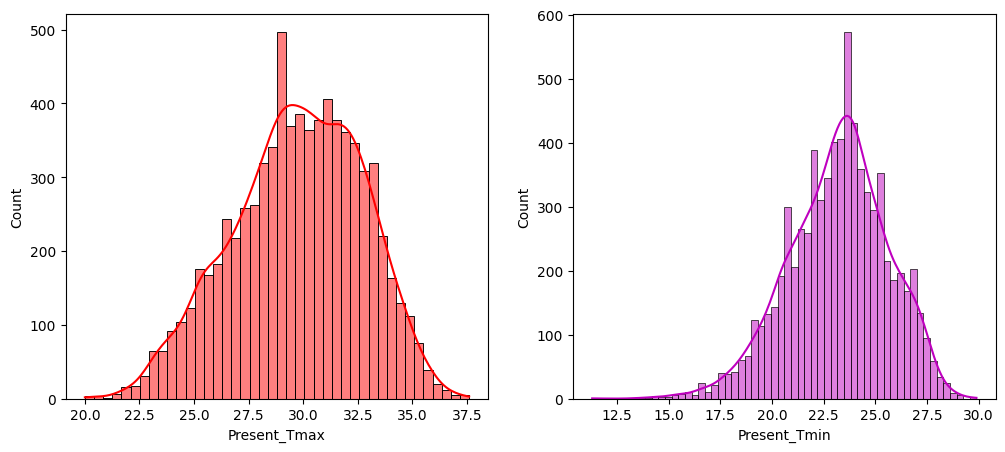

In [18]:
# Plotting histogram for present_Tmax and present_Tmin variables to see the Skewness
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(temperature['Present_Tmax'],kde=True,color='r')
plt.subplot(1,2,2)
sns.histplot(temperature['Present_Tmin'],kde=True,color='m')
plt.show()

#### Observations:
- The average reading of the Present Temperature Maximum for most of the time is 27.5-32.5 degrees Celsius.
- For most of the readings, the Present Temperature Minimum ranges from 22.5°C to 26°C.

### Let’s know the maximum and minimum temperature over the period.

In [19]:
print('Present Maximum Temperature Maxima in year 2013-2016 :',temperature.Present_Tmax.max())
print('Present Maximum Temperature Minima in year 2013-2016 :',temperature.Present_Tmax.min())
print(' Average Present Maximum Temperature in year 2013-2016 :',temperature.Present_Tmax.mean())
print('='*100)
print('Present Minimum Temperature Maxima in year 2013-2016 :',temperature.Present_Tmin.max())
print('Present Minimum Temperature Minima in year 2013-2016 :',temperature.Present_Tmin.min())
print('Average Present Minimum Temperature in year 2013-2016 :',temperature.Present_Tmin.mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Maximum Temperature Minima in year 2013-2016 : 20.0
 Average Present Maximum Temperature in year 2013-2016 : 29.748365840801227
Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377487


##### Verification of the actual occurrence of these Minima and Maxima.

In [20]:
pd.set_option('display.max_columns', None)
temperature.loc[temperature.Present_Tmax==temperature.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-11-08          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
5717   0.218892   0.094288   0.004283   0.000343         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
5717         0.0         0.0  37.4832  127.024  56.4448  1.2313   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
5717      5082.563477       37.0       27.8    8     11  2016  Gyeonggi-do   

            City  
5717  Bucheon-si

In [21]:
temperature.loc[temperature.Present_Tmax==temperature.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
7725   0.046182   0.014955        0.0    0.00063         0.0         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
7725         0.0         0.0  37.6046  126.991  212.335  2.785   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year State City  
7725       4614.76123       23.8       15.1   30      8  2017   NaN  NaN

In [22]:
temperature.loc[temperature.Present_Tmin==temperature.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-02-08          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
2397   0.684685   0.448827   0.762858   0.635728    1.670126    0.005681   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM   Slope  \
2397    0.248885    0.003176  37.5372  126.891  15.5876  0.1554   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year        State  \
2397      5360.226563       31.3       24.8    8      2  2014  Gyeonggi-do   

         City  
2397  Guri-si

In [23]:
temperature.loc[temperature.Present_Tmin==temperature.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  \
6116   0.668264   0.410536   0.452879   0.627238    0.181458         0.0   

      LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM  Slope  \
6116    0.405181    1.015573  37.6181  127.099  53.4712  0.697   

      Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  State   City  
6116      4539.616699       24.6       17.1   27      8  2016  Seoul  Seoul

#### Observation:
- The current maximum temperature <u> maxima </u> over 4 years was recorded at Station 18 on 16-11-08, with a temperature of 37.6 degrees Celsius. Station 18 is located in Bucheon-si town, Gyeonggyido state.
- The Current Maximum Temperature <u> Minima </u> over 4 years was recorded at Station 1 on August 30, 2017 with a temperature of 20 degrees.
- The current maximum temperature recorded at Station 23 is 29.9 degrees Celsius on 14-02-08. The location of Station 23 is Gurisi, Gurisi-Gyeonggido State. The present <u> Maximum </u> Temperature over 4 years is recorded at Station 23.
- Station 17 temperature is located in Soul City. The current maximum temperature at Station 17 is 11.3 degrees Celsius recorded on August 27, 2016. The present <u> Minima </u> temperature at Station 17 over 4 years is 11.2 degrees Celsius.
- We receive high irradiance values on high temperature days and low irradiance values on low temperature days.
- Maximum Humidity occurs when there are global temperature minima. <b> This could mean that humidity and temperature go hand in hand. We will do our best to find out. </b>
- Sunlight will naturally affect wind speeds, rainfall and humidity.

### Use Visualize to visualize and understand this by plotting the line plot across all stations.

<b> Line plot of current temperature maximum over each station</b>

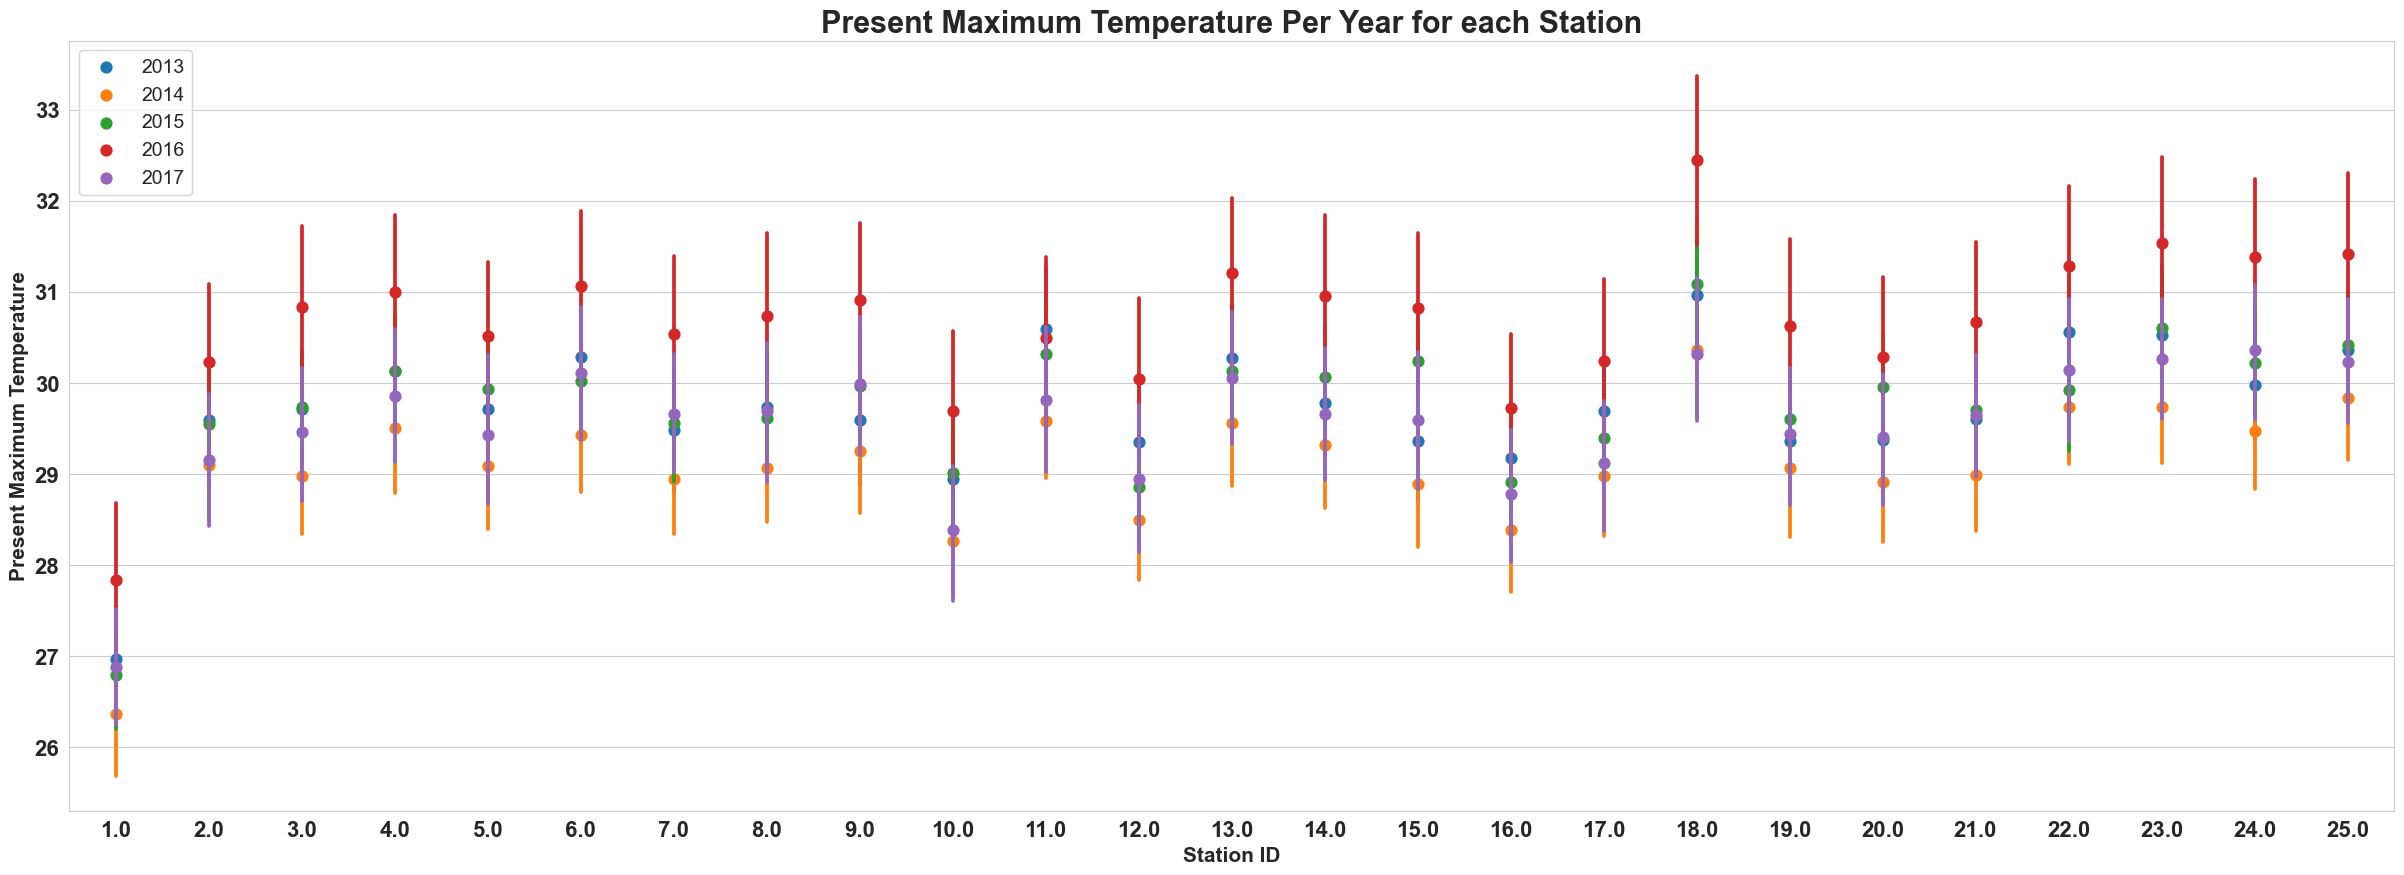

In [26]:
plt.figure(figsize=(30,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmax', data=temperature, hue='Year',join=False)
plt.title('Present Maximum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Maximum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

#### View on line plot of current maximum temperature:-
- Station 18 recorded higher temperatures over all four years compared to rest.
- Station 1 is the best station in all time periods.
- <b>We can see that 2016 is the warmest year, and 2014 is the coldest year. Let’s take a look at these two years separately.</b>
- <b>Year 2017 is better than Year 2016.</b> There was a lot of good news for people in 2017. !!!

<b> Line plot of current temperature minimum over each station</b>

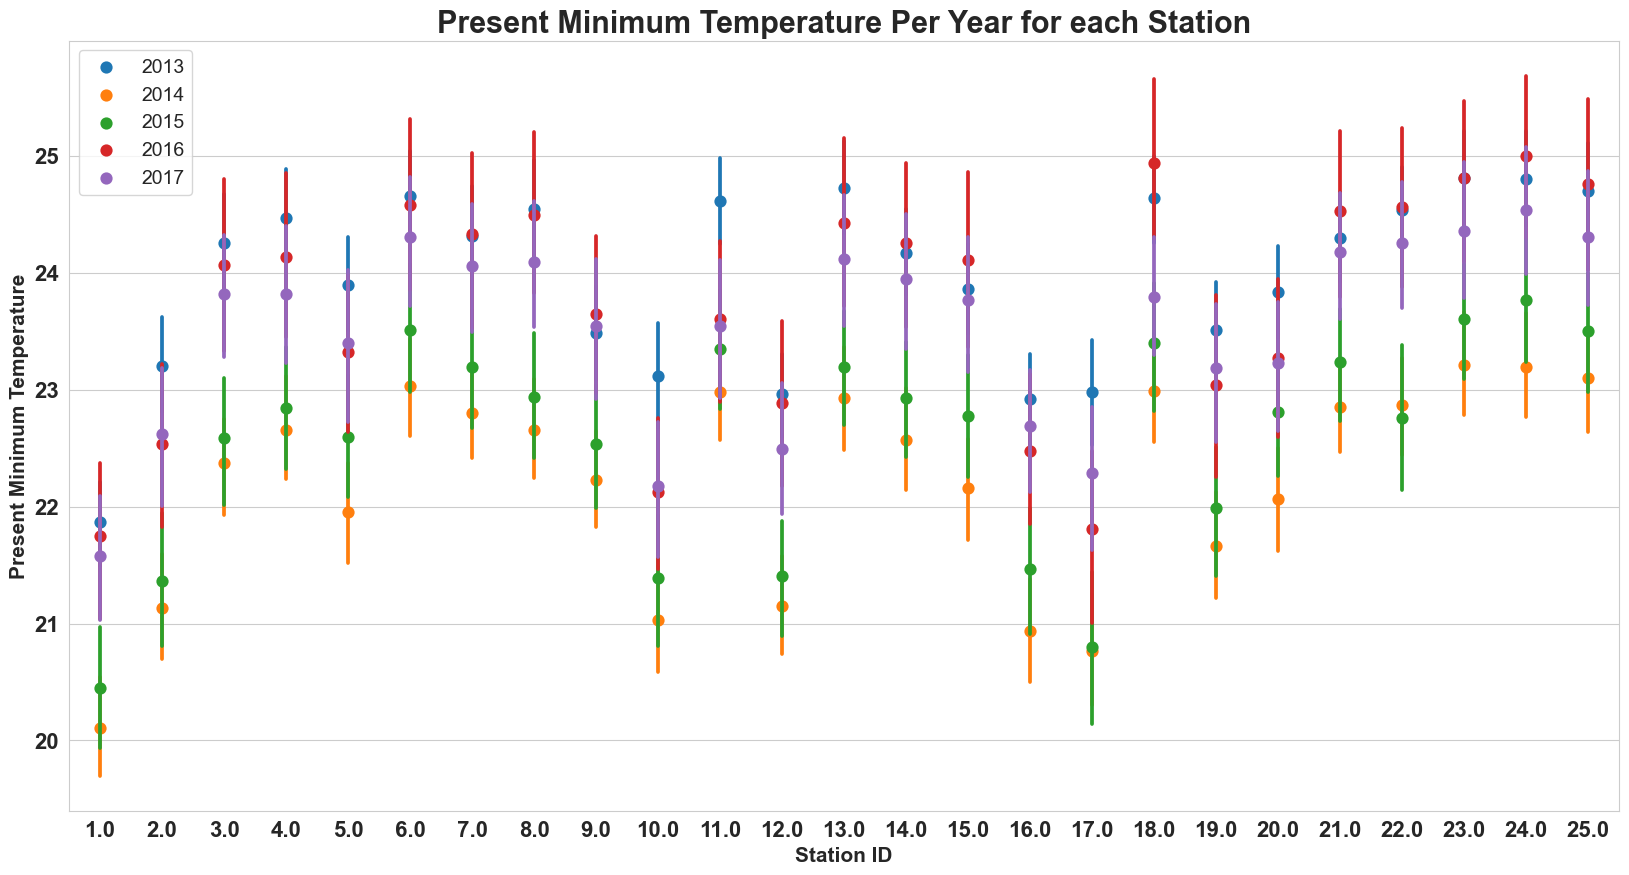

In [27]:
plt.figure(figsize=(20,10))
sns.set_style('whitegrid')
sns.pointplot(x='station', y='Present_Tmin', data=temperature, hue='Year',join=False)
plt.title('Present Minimum Temperature Per Year for each Station', fontsize=22, fontweight='bold')
plt.xlabel('Station ID',{'fontsize':15,'fontweight' :'bold'})
plt.ylabel('Present Minimum Temperature',{'fontsize':15,'fontweight' :'bold'})
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.legend(fontsize=14)

#### Line plot of current minimum temperature observed:-
- Year 2014 is the best year in all time frame
- Station 24 has the highest present minimum temperature despite not having the highest present maximum temperature. <b>This means that over the day the minimum temperature dropped at station 24.</b>
- Station 1 is the best station ever followed by Station 17. Must be a summer tourist destination.

<Axes: xlabel='Month', ylabel='Solar radiation'>

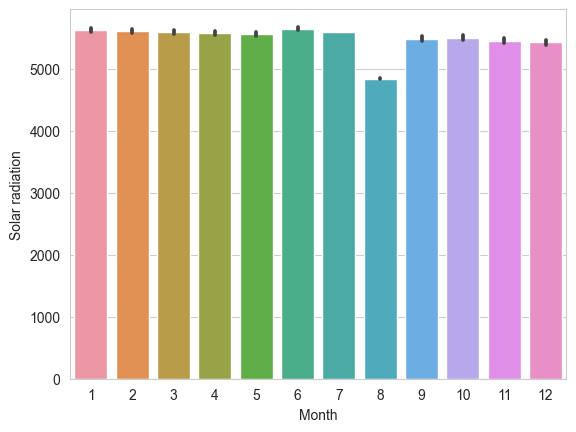

In [28]:
sns.barplot(x=temperature['Month'], y=temperature['Solar radiation'])

<Axes: xlabel='Day', ylabel='Solar radiation'>

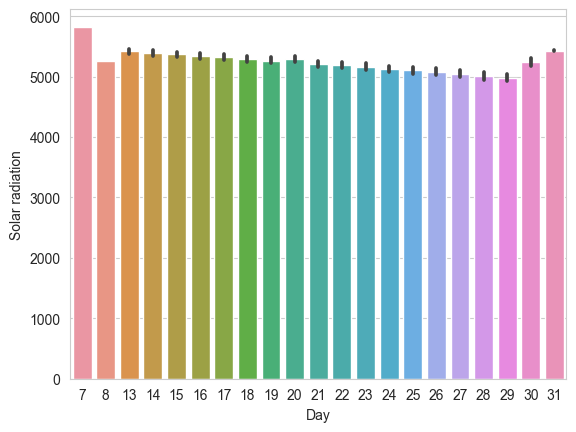

In [29]:
sns.barplot(x=temperature['Day'], y=temperature['Solar radiation'])

<Axes: xlabel='Year', ylabel='Solar radiation'>

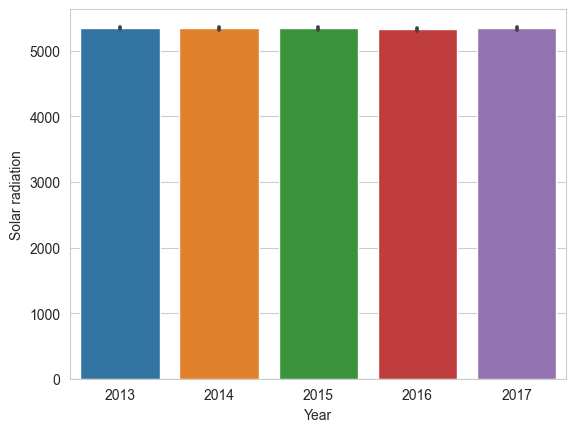

In [30]:
sns.barplot(x=temperature['Year'], y=temperature['Solar radiation'])

<Axes: xlabel='State', ylabel='Solar radiation'>

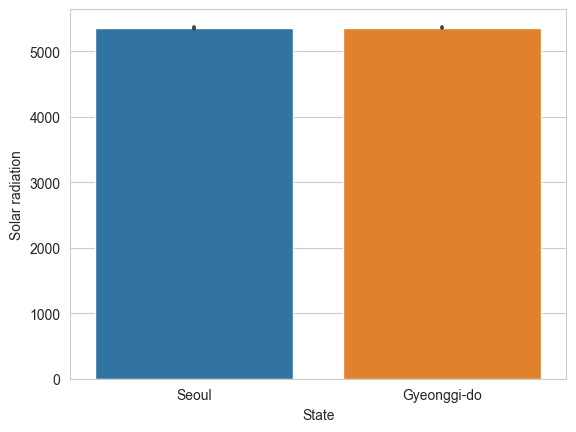

In [31]:
sns.barplot(x=temperature['State'], y=temperature['Solar radiation'])

<Axes: xlabel='City', ylabel='Solar radiation'>

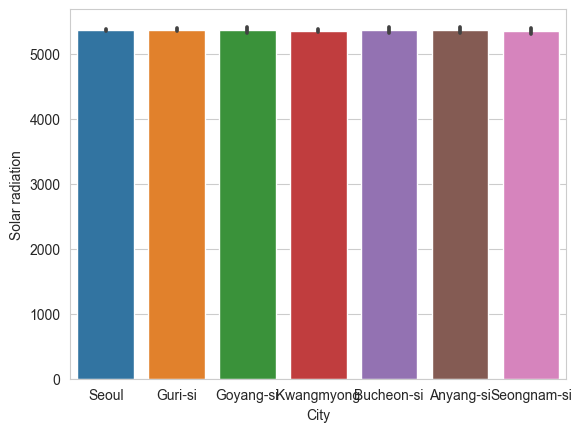

In [32]:
sns.barplot(x=temperature['City'], y=temperature['Solar radiation'])

<Axes: xlabel='station', ylabel='Solar radiation'>

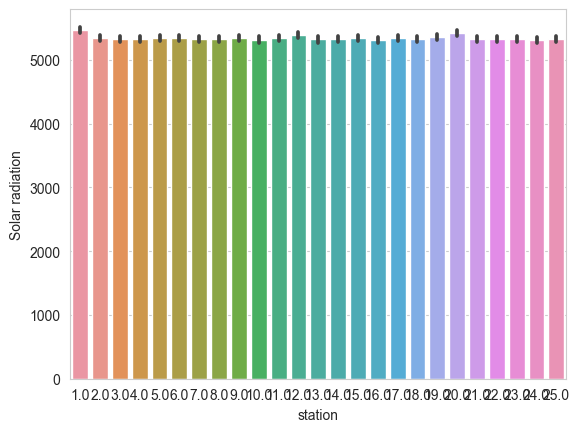

In [33]:
sns.barplot(x=temperature['station'], y=temperature['Solar radiation'])

<Axes: xlabel='Next_Tmax', ylabel='Solar radiation'>

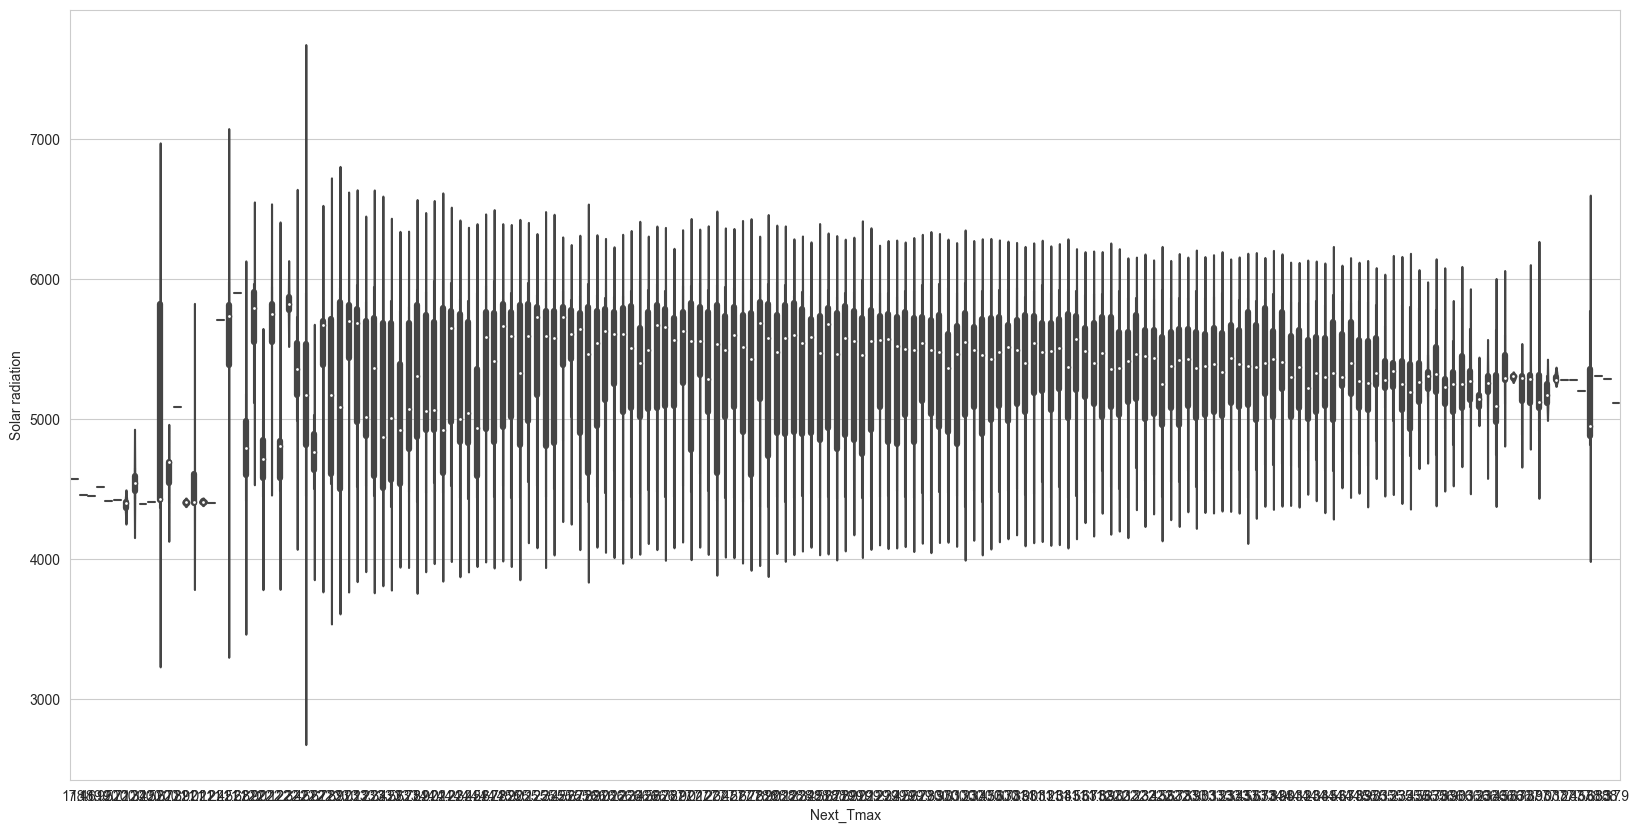

In [38]:
plt.figure(figsize=(20,10))
plt.plot(color='blue')
sns.violinplot(x=temperature['Next_Tmax'], y=temperature['Solar radiation'])

<Axes: xlabel='Next_Tmin', ylabel='Solar radiation'>

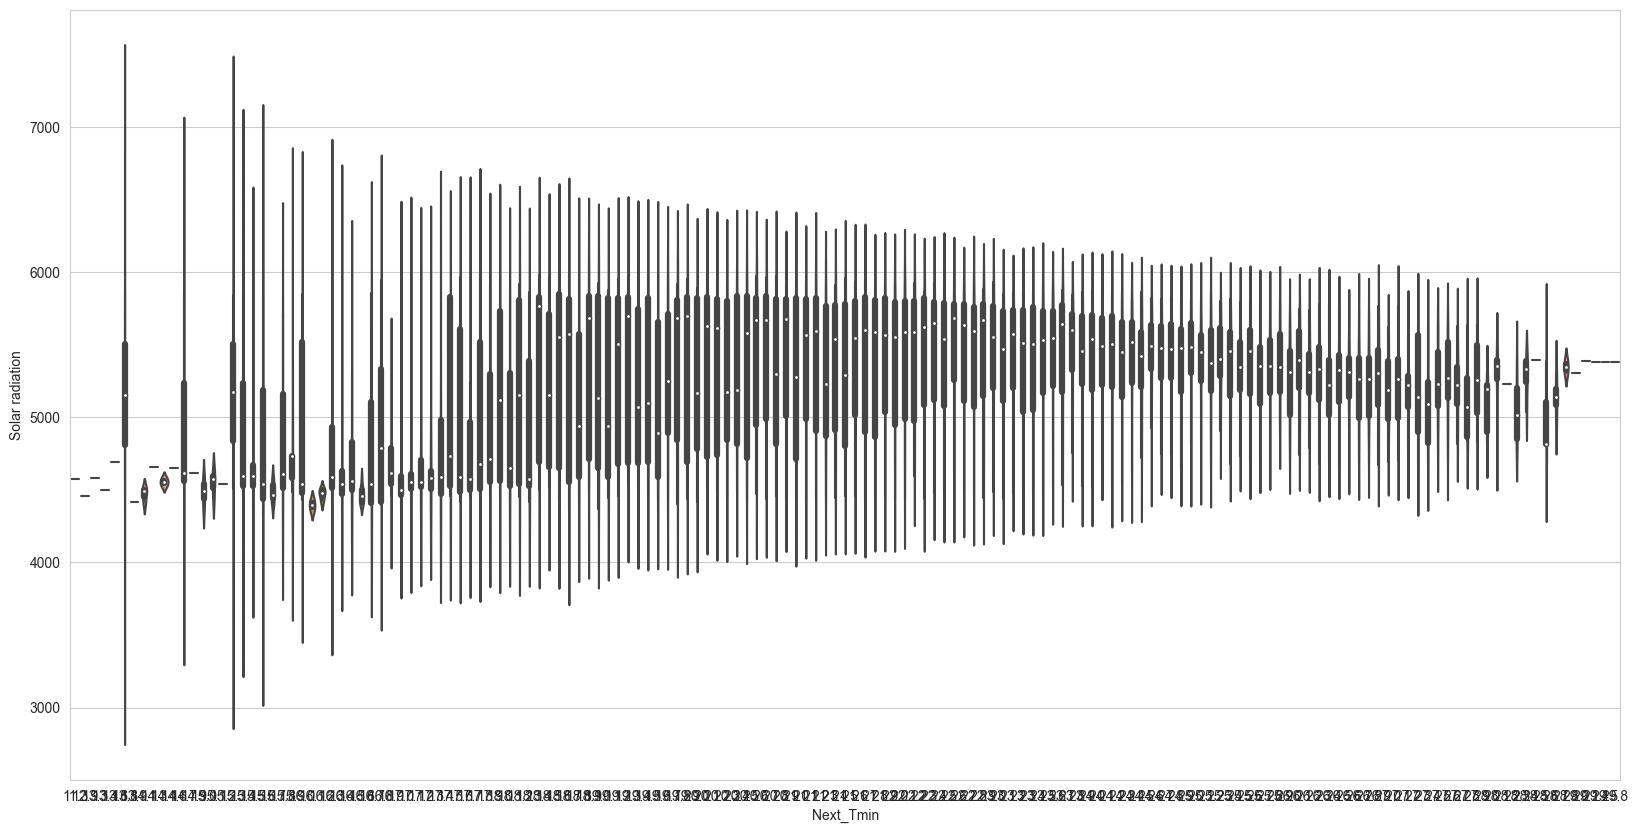

In [39]:
plt.figure(figsize=(20,10))
plt.plot(color='blue')
sns.violinplot(x=temperature['Next_Tmin'], y=temperature['Solar radiation'])

### Target Variable exploration.

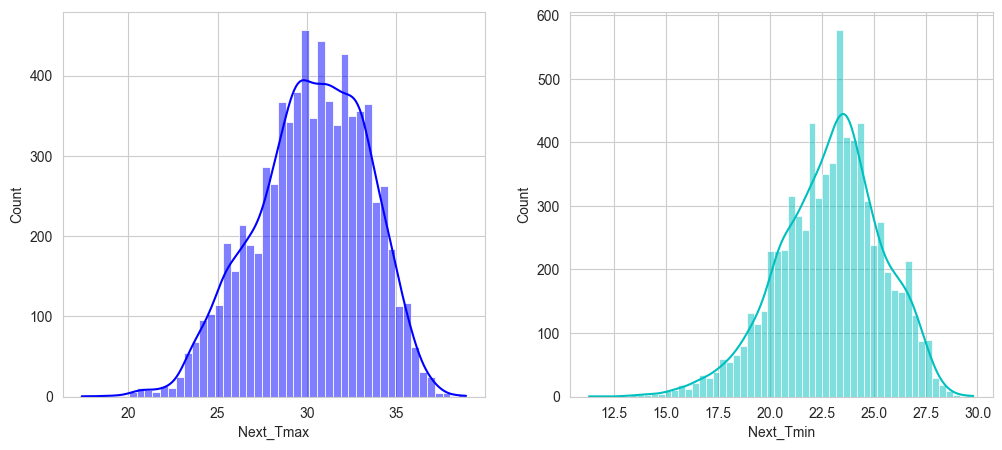

In [40]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(temperature['Next_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(temperature['Next_Tmin'],kde=True,color='c')
plt.show()

#### Observations:
This means that we get the same results as we would get at the current temperature.
- The average reading of Next Temperature Maximum for most of the time is 27.5-32.5 degrees.
- Most of the time, the Next Temperature Minimum ranges from 22.5 degrees to 26 degrees.

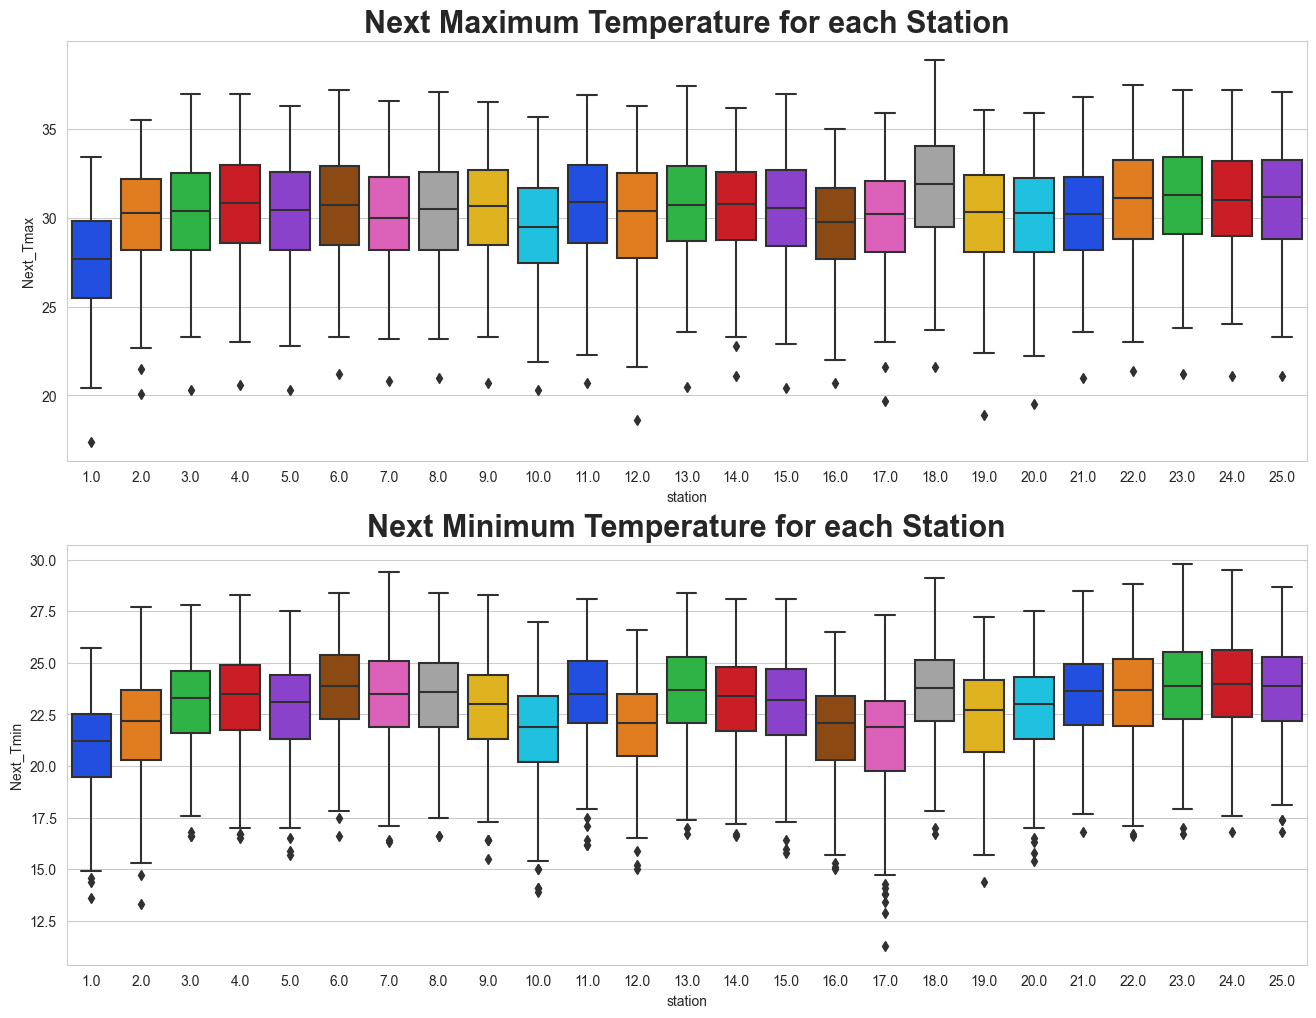

In [41]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(temperature['station'],temperature['Next_Tmax'],data=temperature,palette="bright")
plt.title('Next Maximum Temperature for each Station', fontsize=22, fontweight='bold')
plt.subplot(2,1,2)
sns.boxplot(temperature['station'],temperature['Next_Tmin'],data=temperature,palette="bright")
plt.title('Next Minimum Temperature for each Station', fontsize=22, fontweight='bold')
plt.show()

#### Observation :
From the box plot 
- We can see that Station 18 has the highest temperature collection for Next_Tmax target as well as Next_Tmin target. 
- The maximum temperature difference at the same station occurs at Station 17.

### <b>Next Maximum Temperature Vs Cloud cover</b>

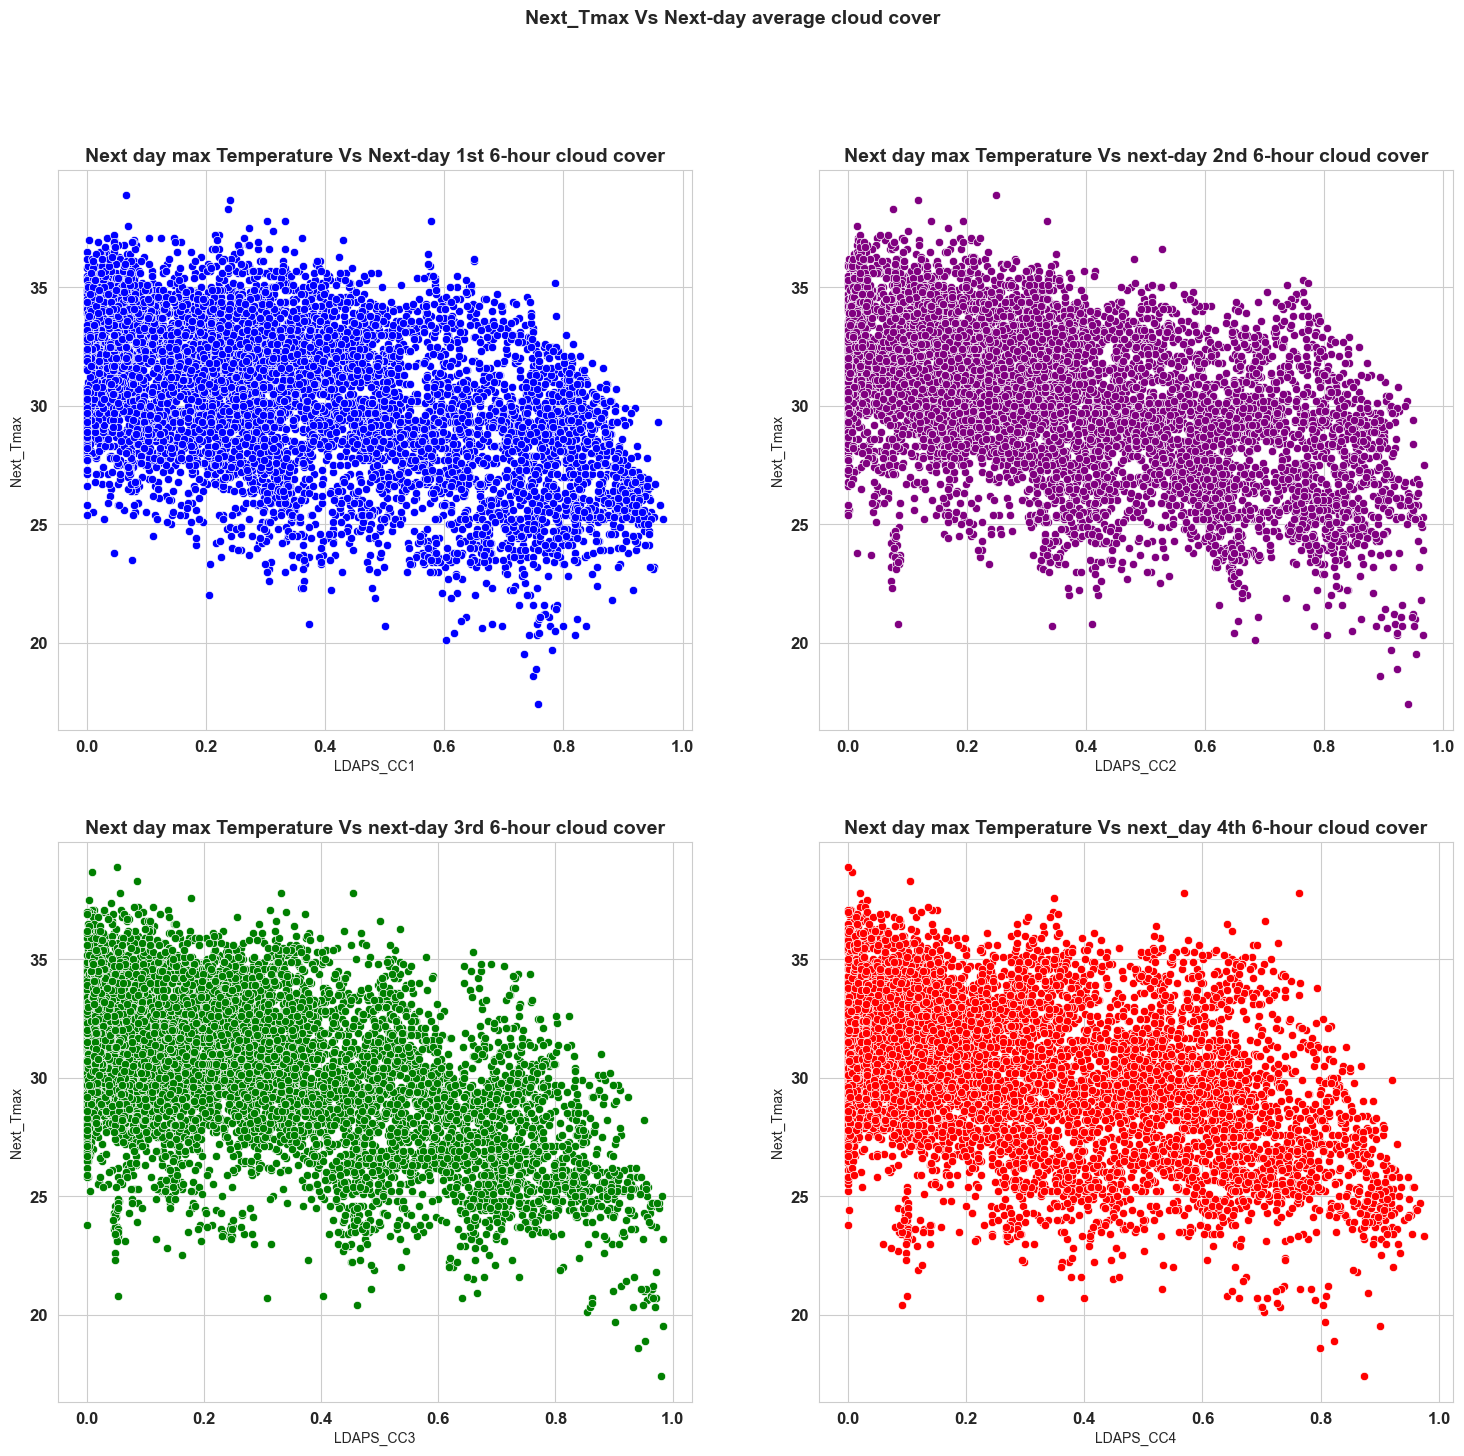

In [42]:
# Comparing Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=temperature,color="blue")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=temperature,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=temperature,color='green')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=temperature,color="red")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation:
<b><em>Irrespective of 6 hr quarter in 24 hr day time, Next-day Temperature Maximum decreases as cloud cover increases beyond 0.6.</em></b>

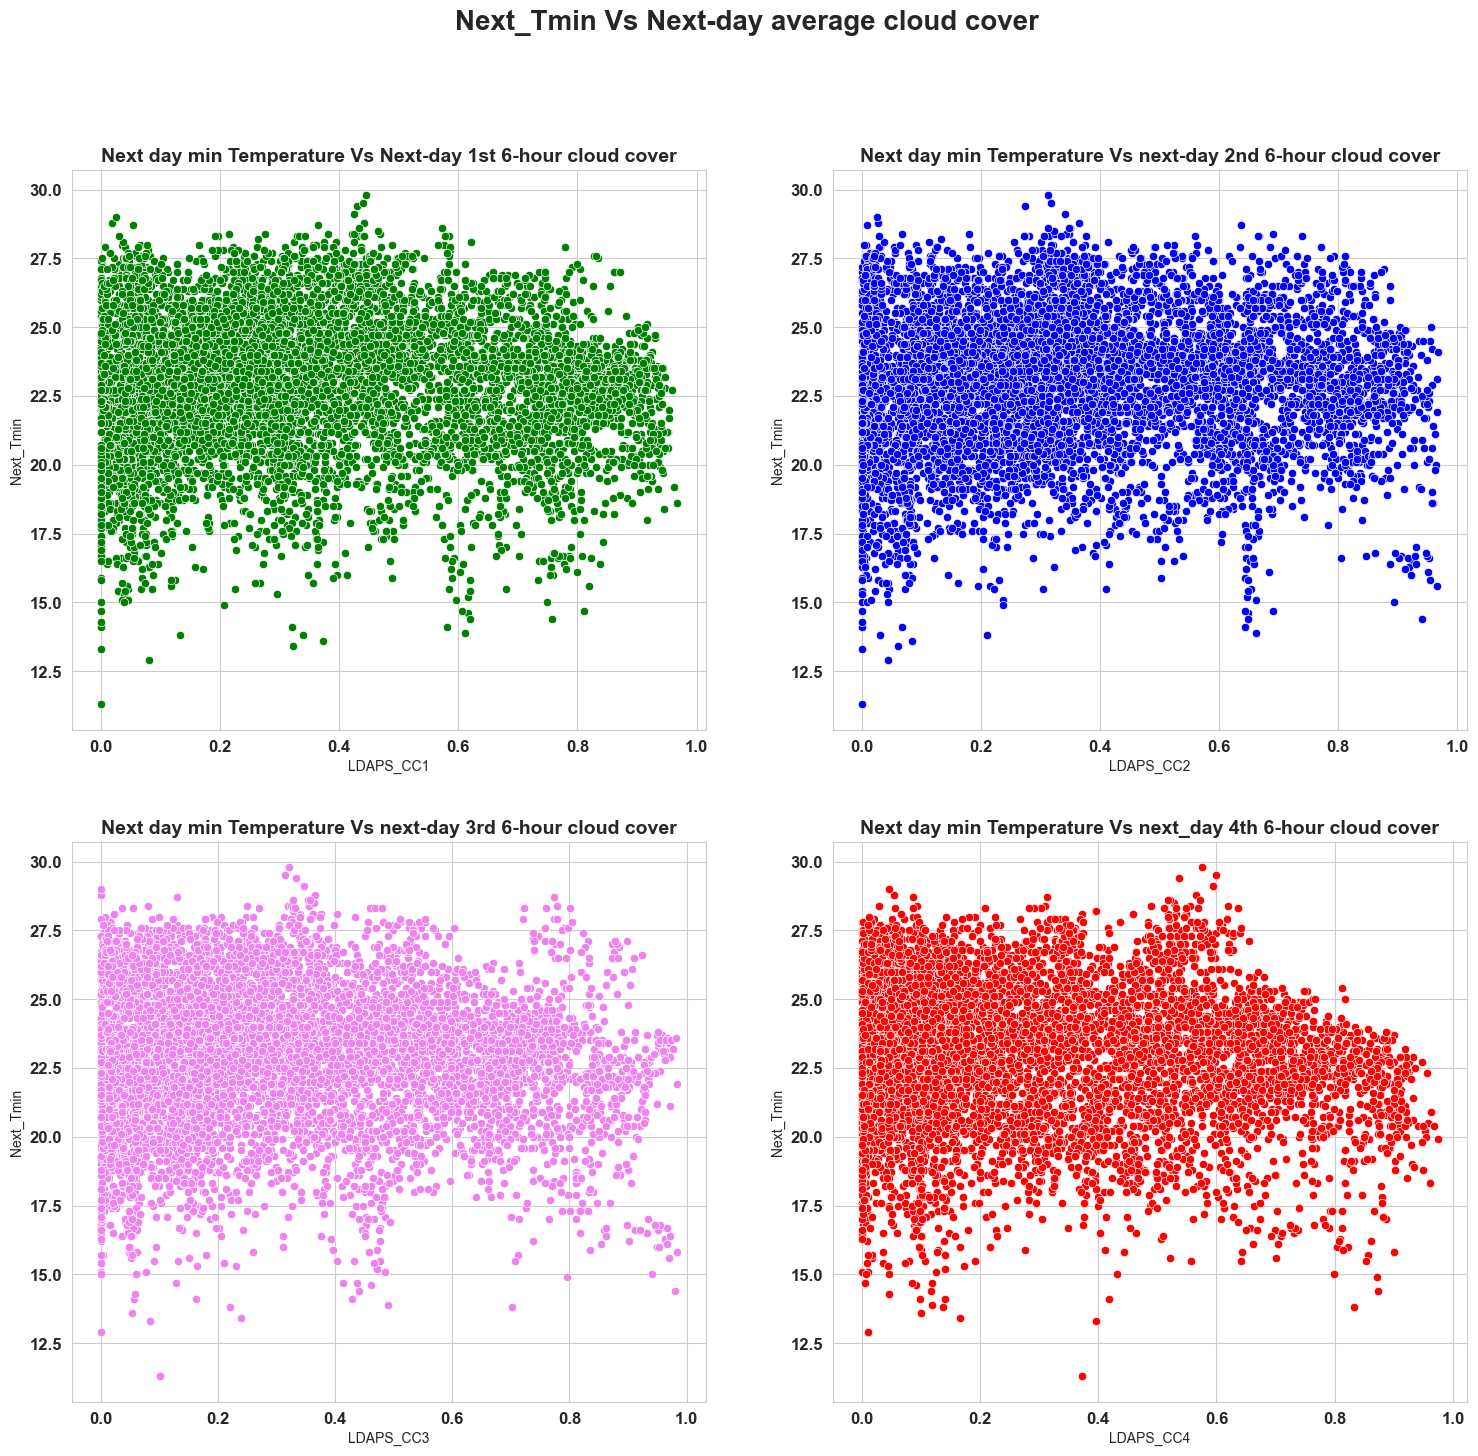

In [43]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=temperature,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=temperature,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=temperature,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=temperature,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation:
<b><em> Next_Tmin does not have a significant relationship with cloud coverage in scatterplots. So, Next_Tmin is not affected by cloud coverage.</em></b>
#### Cloud cover and precipitation are the most likely to be affected by solar radiation, it’s time to look at them.

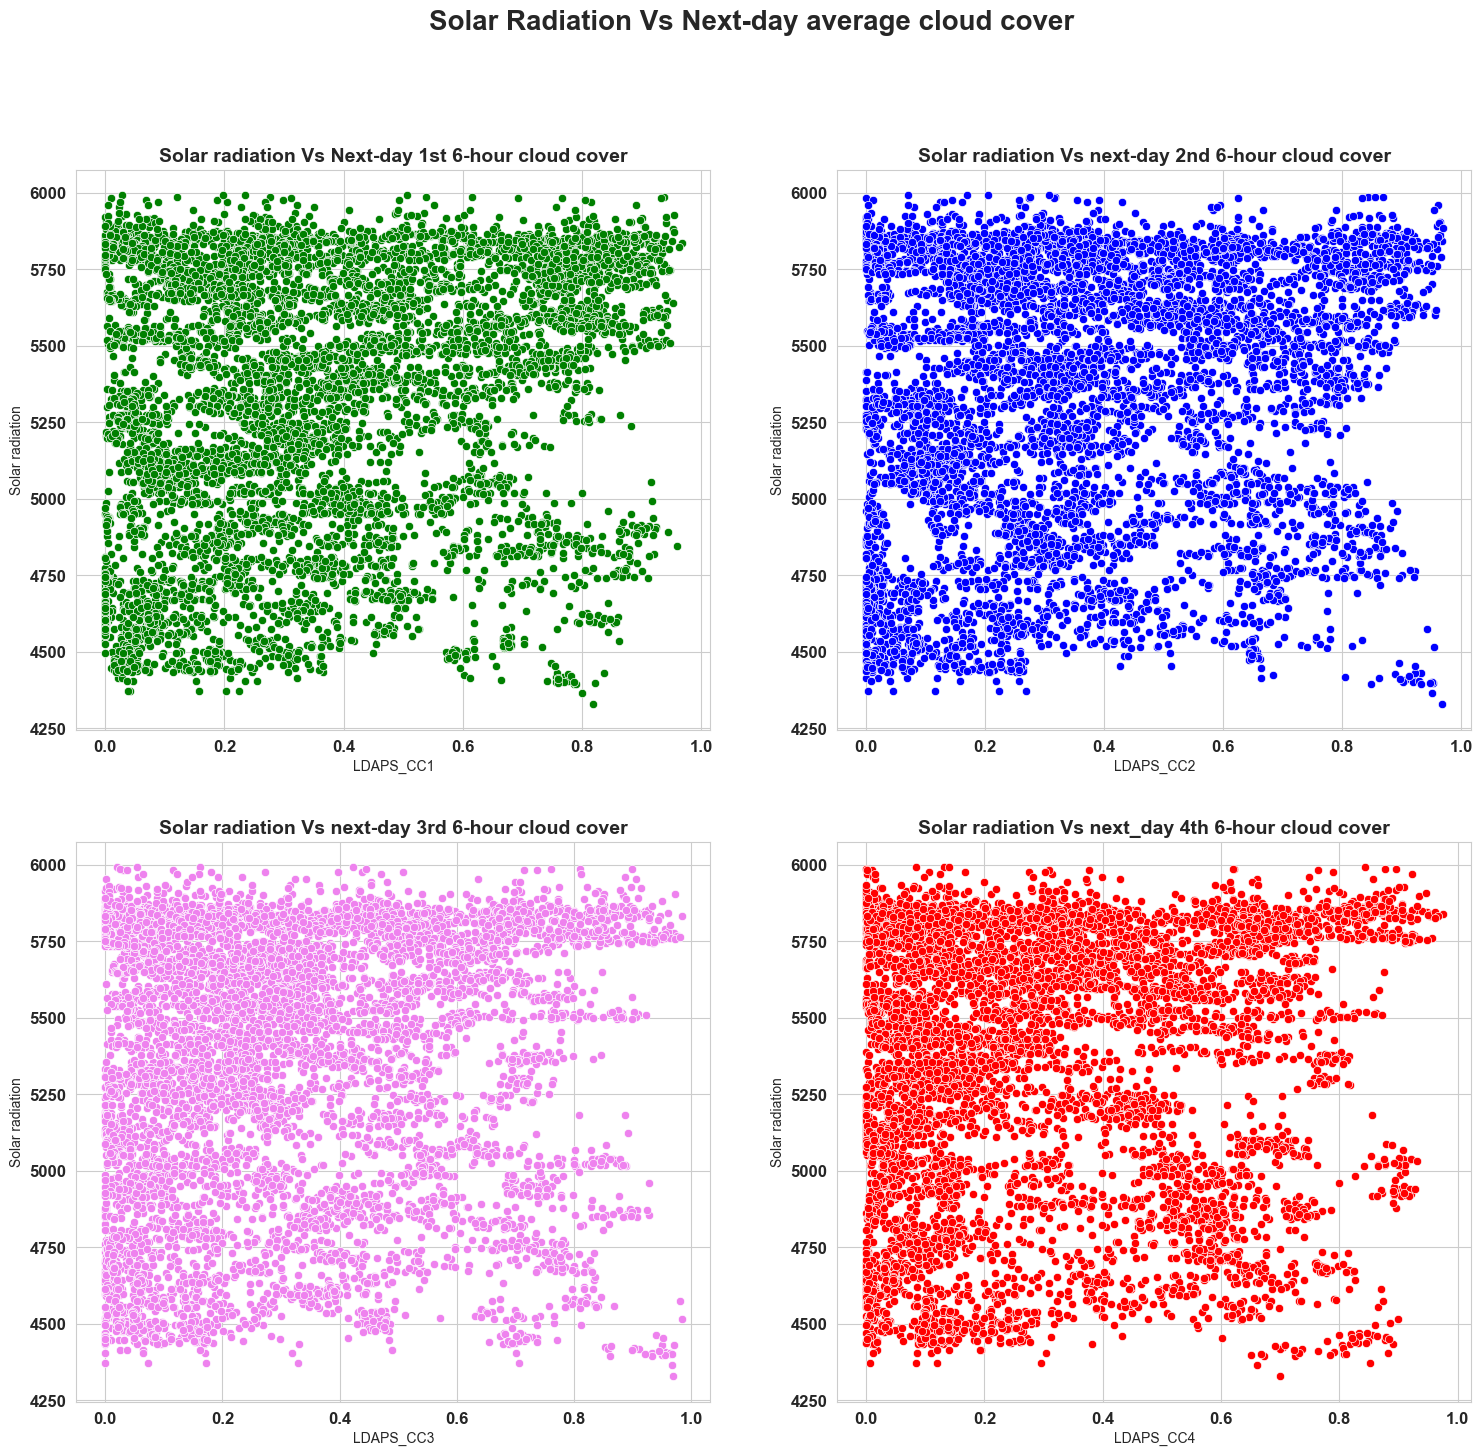

In [44]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=temperature,color="g")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=temperature,color='b')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=temperature,color='violet')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=temperature,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation: 
To sum up, high value solar irradiance contributed the most to cloud cover above 0.7.
### Precipitation VS Solar radiation

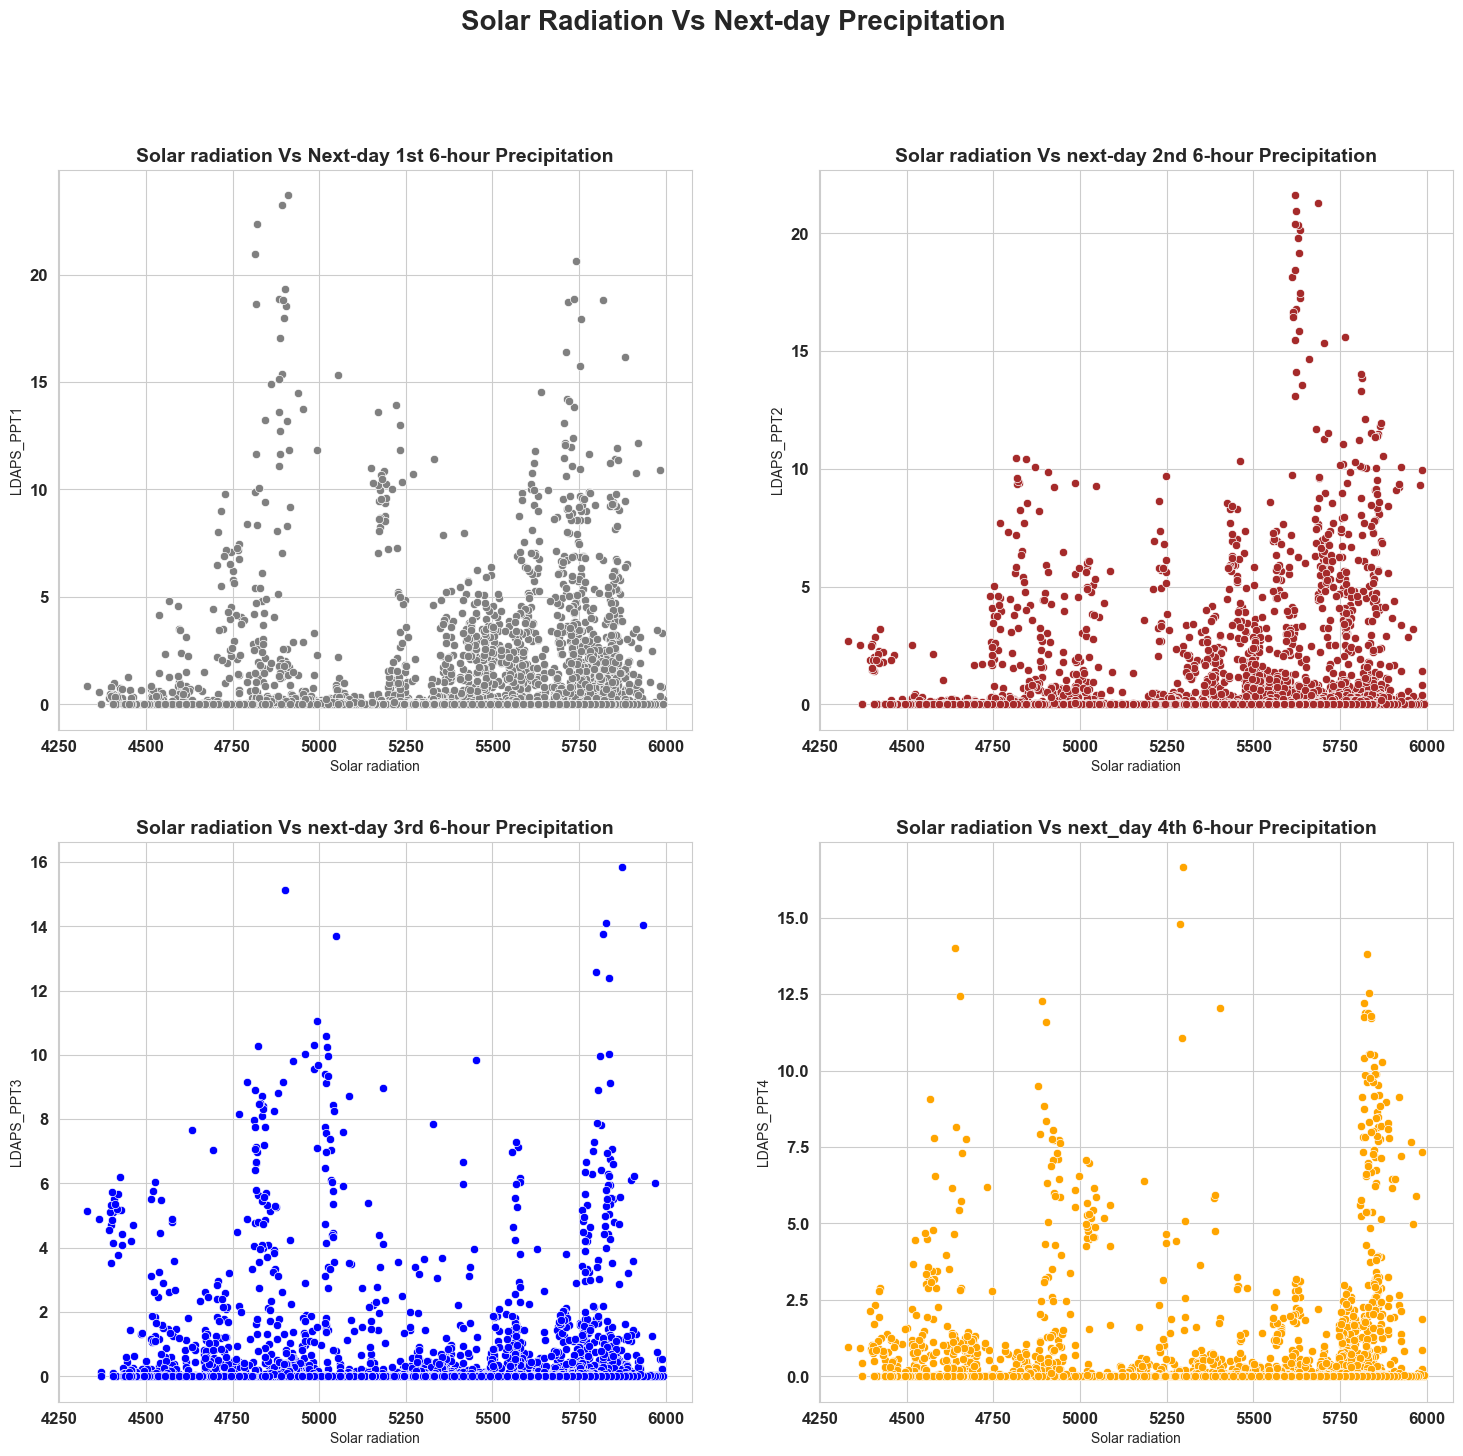

In [45]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=temperature,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=temperature,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=temperature,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14, fontweight='bold')
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=temperature,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observation:
- No matter what part of the 6 hour quarter you belong to,<b> The higher the solar irradiance value, the higher the amount of rainfall (usually higher than 8). The solar irradiance value is 5500w / m2 or higher.</b>
- If we combine the above scatter plot of solar radiation with the scatter plot of cloud cover,<b> From this, we can conclude that the higher the value of the solar irradiance cloud cover, the higher the precipitation followed. Higher the precipitation, the higher the cloud cover.</b>


### <b>All of this raises only a few questions in this regard. :</b>
1. Where does the relative humidity and wind velocity fit into this precipitation equation?
2. Latent heat refers to heat assimilation at unchanged temperature; variations in latent heat flux must have some impact on relative humidity.
3. Wind tends to blow clound, which is another intriguing thing to anticipate. What does wind speed mean in relative terms when there is a lot of cloud cover?
4. What are the annual variations in precipitation, cloud cover, and wind speed?
5. temperature variations throughout the course of a year?

### Let's begin our research with the previous query.

<Axes: xlabel='Month', ylabel='LDAPS_PPT1'>

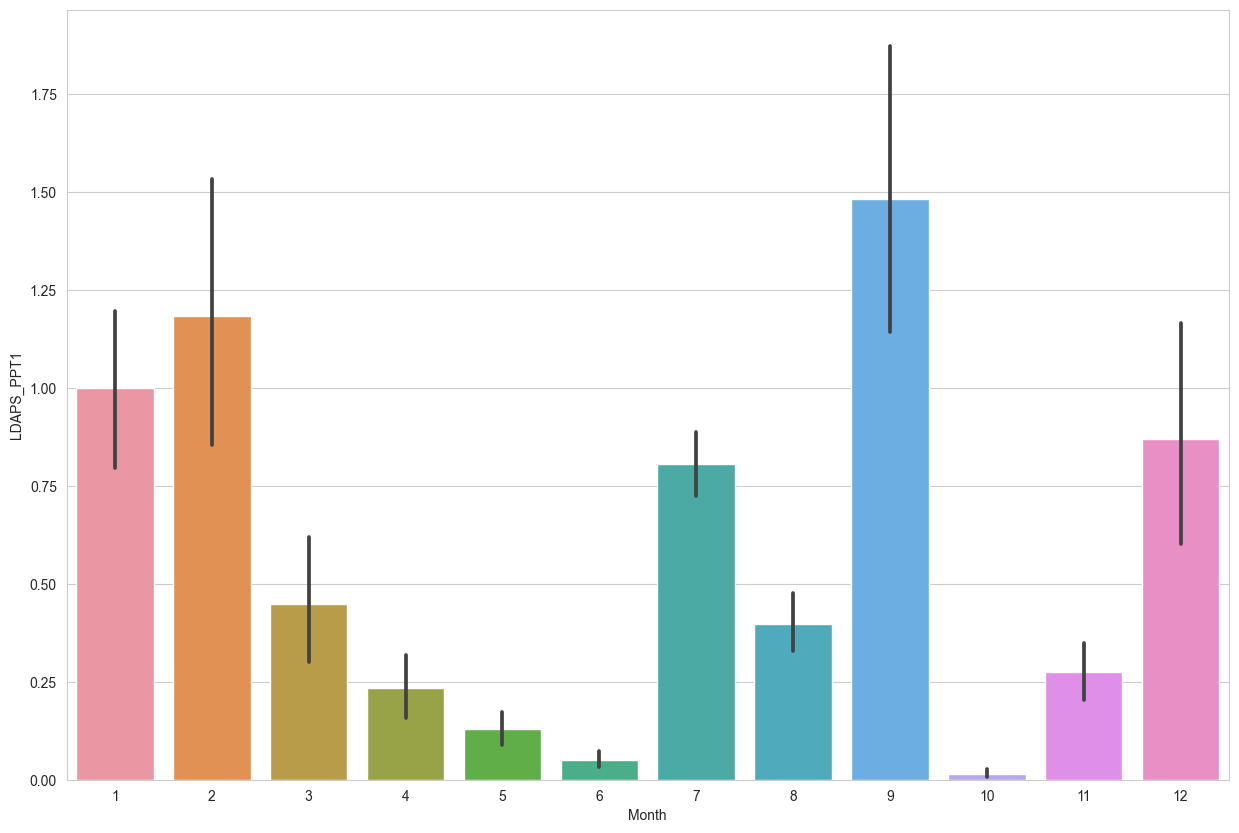

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(x=temperature['Month'], y=temperature['LDAPS_PPT1'])

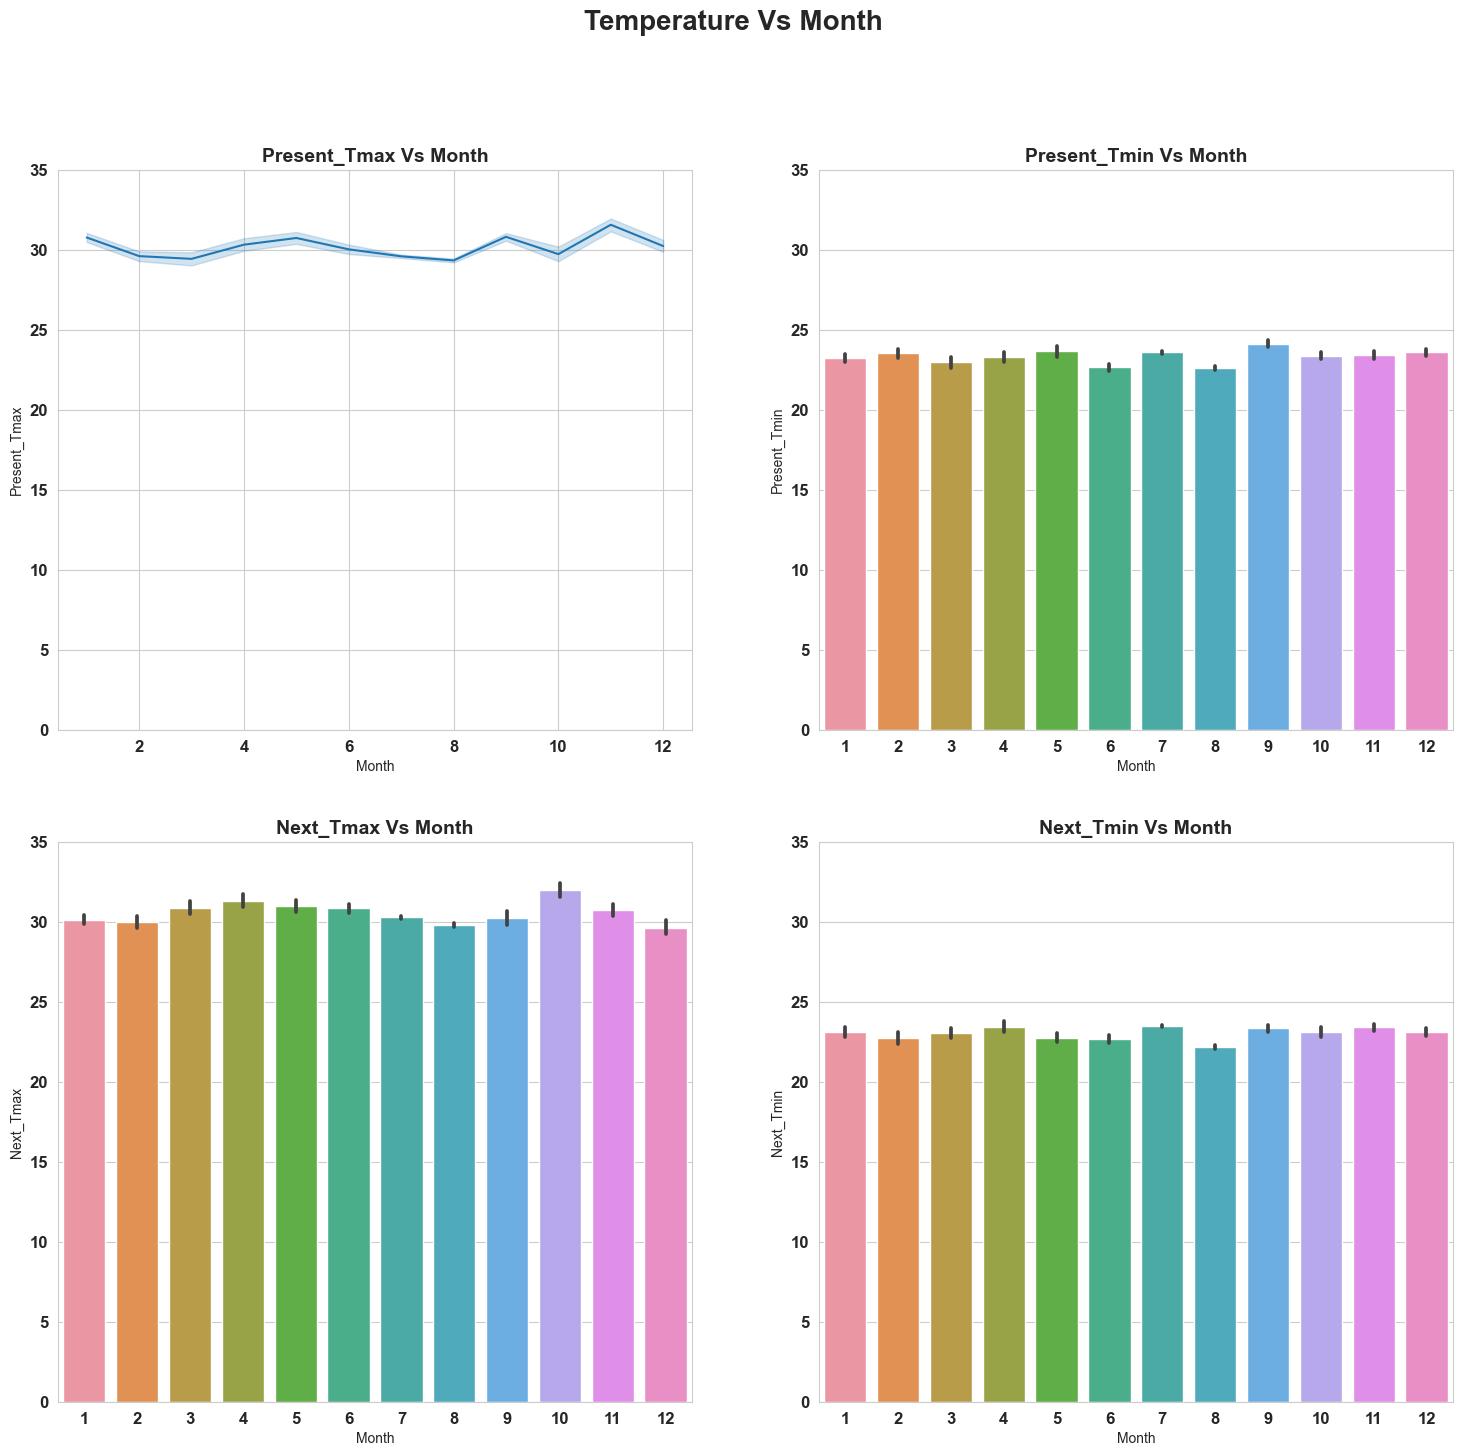

In [47]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Temperature Vs Month',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Present_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.lineplot(y='Present_Tmax',x='Month',data=temperature)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Present_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Present_Tmin',x='Month',data=temperature)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next_Tmax Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmax',x='Month',data=temperature)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_Tmin Vs Month',fontsize=14, fontweight='bold')
axes=sns.barplot(y='Next_Tmin',x='Month',data=temperature)
axes.set_ylim([0, 35])
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

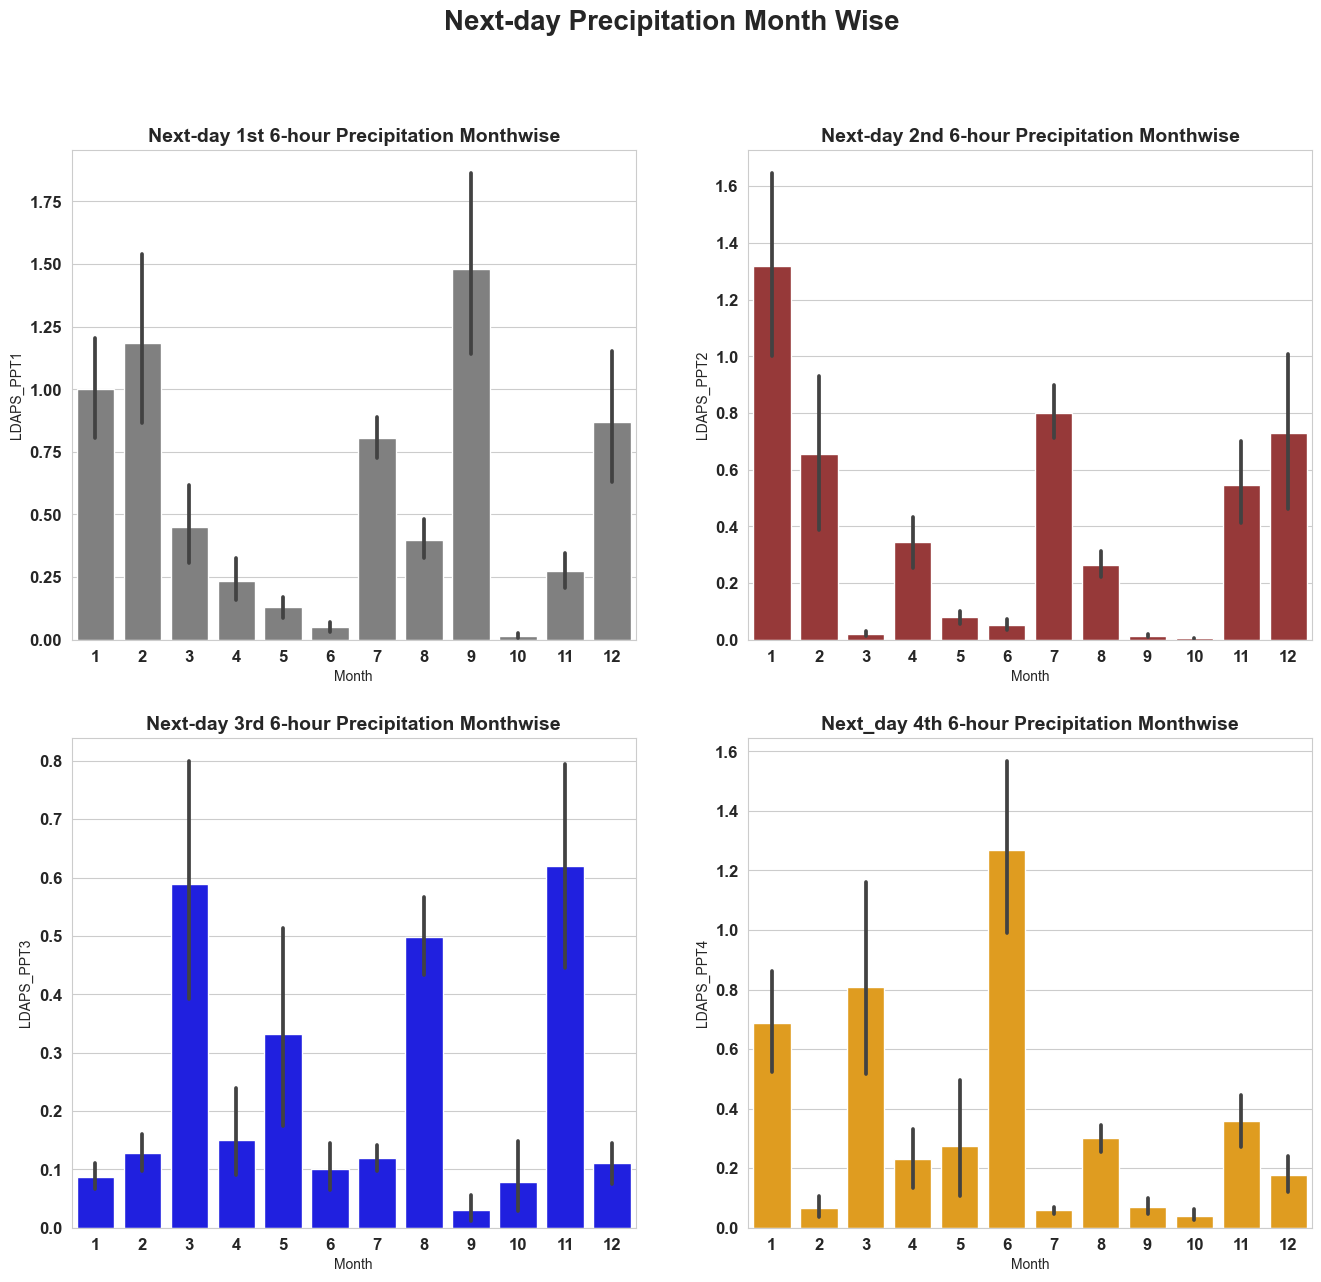

In [48]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(16,14))
plt.suptitle('Next-day Precipitation Month Wise',fontsize=20, fontweight='bold')

plt.subplot(2,2,1)
plt.title('Next-day 1st 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=temperature['Month'], y=temperature['LDAPS_PPT1'],data=temperature,color="grey")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next-day 2nd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=temperature['Month'], y=temperature['LDAPS_PPT2'],data=temperature,color='brown')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next-day 3rd 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=temperature['Month'], y=temperature['LDAPS_PPT3'],data=temperature,color='blue')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,4)
plt.title('Next_day 4th 6-hour Precipitation Monthwise',fontsize=14, fontweight='bold')
sns.barplot(x=temperature['Month'], y=temperature['LDAPS_PPT4'],data=temperature,color="orange")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')
plt.show()

#### Observations :
- The heaviest precipitation in the ninth month was recorded in the morning.
- In the first month, the second section of the day had the most precipitation.
- The third portion of the day in the eleventh month had the most precipitation.

- The 4th quarter of the day in the sixth month had the most precipitation.

Minimum Solar radiation : 4329.520508
Maximum Solar radiation : 5992.895996
Average Solar radiation : 5343.72420785672


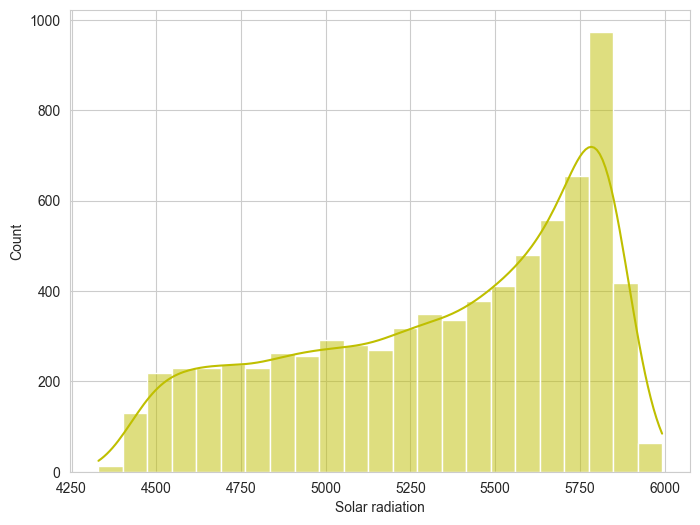

In [49]:
plt.figure(figsize=(8,6))
sns.histplot(temperature['Solar radiation'],kde=True,color='y')
print('Minimum Solar radiation :',temperature['Solar radiation'].min())
print('Maximum Solar radiation :',temperature['Solar radiation'].max())
print('Average Solar radiation :',temperature['Solar radiation'].mean())

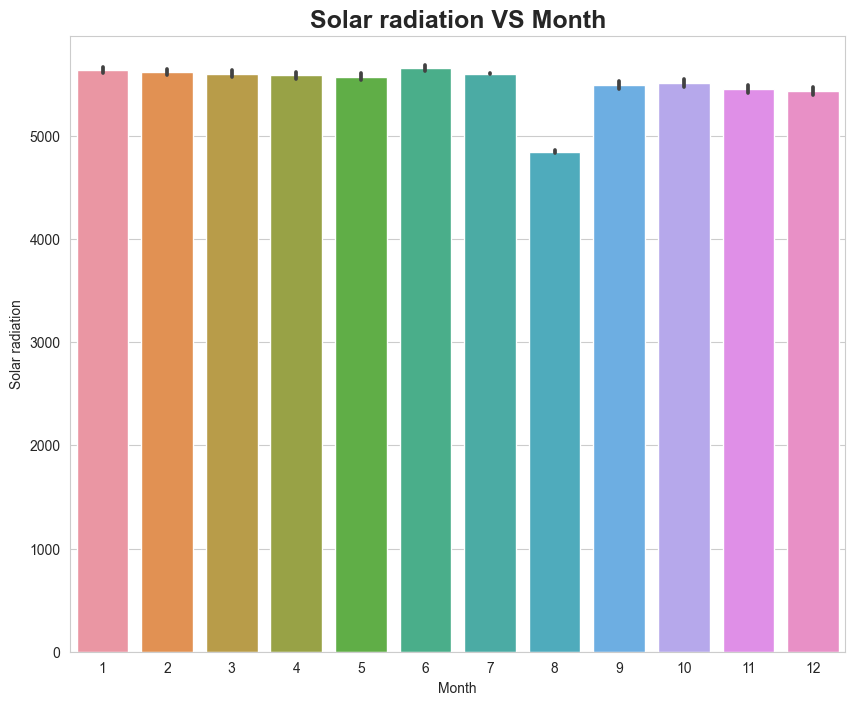

In [50]:
sns.set_palette('husl')
plt.figure(figsize=(10,8))
sns.barplot(y=temperature['Solar radiation'], x=temperature['Month'])
plt.title('Solar radiation VS Month',fontsize=18, fontweight='bold')
plt.show()

#### Observations :
- Data on solar radiation are left skewed. 
- Its minimum and maximum values are 4329.52 Wh/m2 and 5992.89 Wh/m2, respectively.
- The range of sun radiation readings for most of reading is 5600–5850.
- A month with the least sun radiation is month eight.

Minimum Wind Speed : 2.882579625 m/s
Maximum Wind Speed : 21.85762099 m/s
Average Wind Speed : 7.094096699159837 m/s


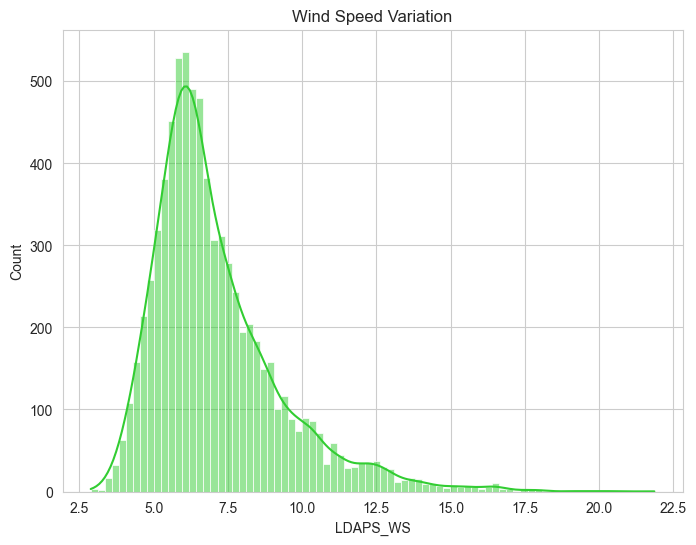

In [51]:
plt.figure(figsize=(8,6))
sns.histplot(temperature['LDAPS_WS'],kde=True,color='limegreen')
plt.title('Wind Speed Variation')
print('Minimum Wind Speed :',temperature['LDAPS_WS'].min(),'m/s')
print('Maximum Wind Speed :',temperature['LDAPS_WS'].max(),'m/s')
print('Average Wind Speed :',temperature['LDAPS_WS'].mean(),'m/s')

#### Observations :
- Its minimum and highest values are 2.88 m/s and 21.85 m/s, respectively. 
- Most reading values fall between 5 and 8 m/s; 
- the graph is slightly right-skewed.

Minimum RHmax is 58.93628311 % and Maximum RHmax is 100.0001526 %
Minimum RHmin is 19.79466629 % and Maximum RHmin is 98.5247345 %


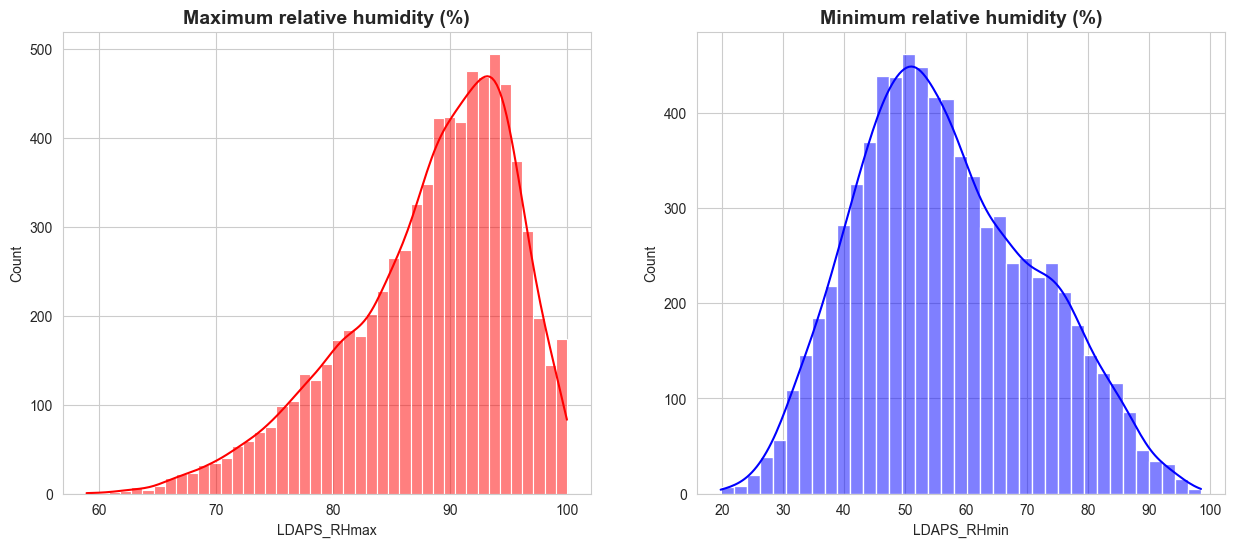

In [52]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(temperature['LDAPS_RHmax'],kde=True,color='r')
plt.title('Maximum relative humidity (%)',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(temperature['LDAPS_RHmin'],kde=True,color='b')
plt.title('Minimum relative humidity (%)',fontsize=14, fontweight='bold')
print('Minimum RHmax is {} % and Maximum RHmax is {} %'.format(temperature['LDAPS_RHmax'].min(),temperature['LDAPS_RHmax'].max()))
print('Minimum RHmin is {} % and Maximum RHmin is {} %'.format(temperature['LDAPS_RHmin'].min(),temperature['LDAPS_RHmin'].max()))

#### Observations :
- The data for the minimum relative humidity is somewhat right-skewed, whereas the data for the maximum relative humidity is left-skewed.
- The range of maximum relative humidity for the majority of the days is between 90 and 97. 
- Maximum relative humidity ranges from 45 to 62 percent.

Minimum Tmax applied lapse rate is 17.62495378 (Â°C) and Maximum Tmax applied lapse rate is 38.54225522 (Â°C)
Minimum Tmin is applied lapse rate 14.27264631 (Â°C) and Maximum Tmin applied lapse rate is 29.61934244 (Â°C)


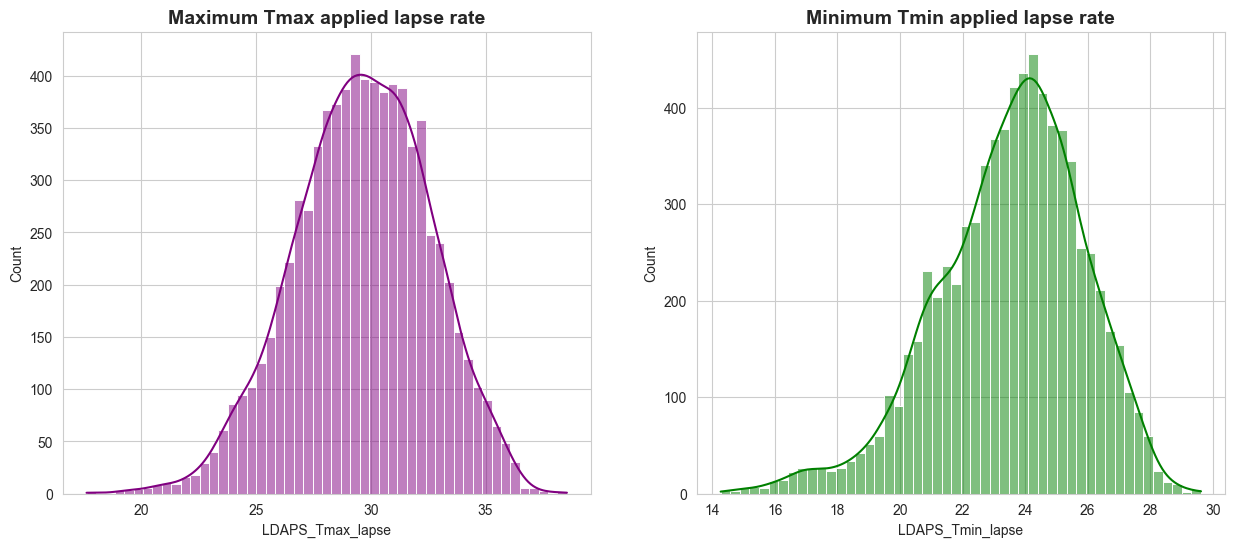

In [53]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.histplot(temperature['LDAPS_Tmax_lapse'],kde=True,color='purple')
plt.title('Maximum Tmax applied lapse rate',fontsize=14, fontweight='bold')
plt.subplot(1,2,2)
sns.histplot(temperature['LDAPS_Tmin_lapse'],kde=True,color='green')
plt.title('Minimum Tmin applied lapse rate',fontsize=14, fontweight='bold')
print('Minimum Tmax applied lapse rate is {} (Â°C) and Maximum Tmax applied lapse rate is {} (Â°C)'.format(temperature['LDAPS_Tmax_lapse'].min(),temperature['LDAPS_Tmax_lapse'].max()))
print('Minimum Tmin is applied lapse rate {} (Â°C) and Maximum Tmin applied lapse rate is {} (Â°C)'.format(temperature['LDAPS_Tmin_lapse'].min(),temperature['LDAPS_Tmin_lapse'].max()))

#### Observation :
- For the applied lapse rate, Tmax and Tmin are almost regularly distributed. 
- Tmax_lapse values typically range from 27 to 33 (°C) on most days. 
- The bulk of the time, Tmin_lapse's values fall between the temperatures of 23 and 26 (°C).

Minimum Latent Heat Flux : -13.60321209
Maximum Latent Heat Flux : 213.4140062
Average Latent Heat Flux : 62.492606287988046


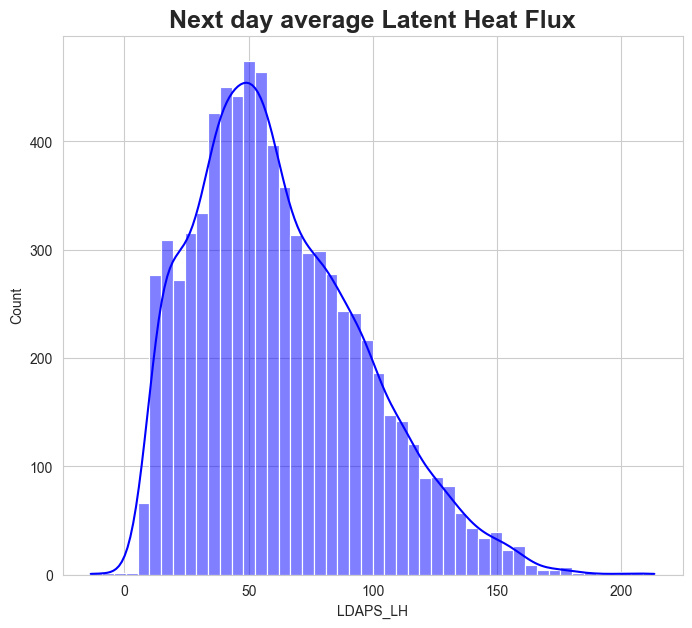

In [54]:
plt.figure(figsize=(8,7))
sns.histplot(temperature['LDAPS_LH'],kde=True,color='blue')
plt.title('Next day average Latent Heat Flux',fontsize=18, fontweight='bold')
print('Minimum Latent Heat Flux :',temperature['LDAPS_LH'].min())
print('Maximum Latent Heat Flux :',temperature['LDAPS_LH'].max())
print('Average Latent Heat Flux :',temperature['LDAPS_LH'].mean())

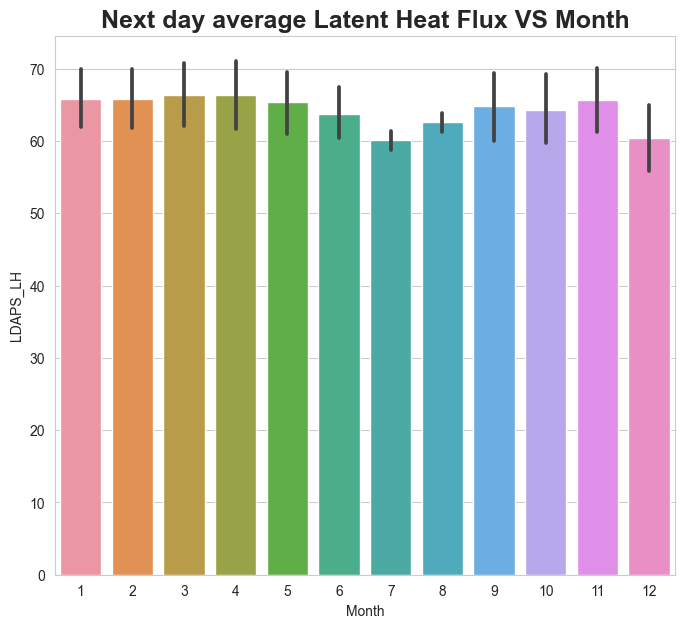

In [55]:
plt.figure(figsize=(8,7))
sns.barplot(y=temperature['LDAPS_LH'], x=temperature['Month'])
plt.title('Next day average Latent Heat Flux VS Month',fontsize=18, fontweight='bold')
plt.show()

**Minimum Latent Heat Flux observe in month of July.**

# Encoding categorical data

In [56]:
# Sort columns by datatypes
temperature.columns.to_series().groupby(temperature.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year'], object: ['State', 'City']}

In [57]:
# Using Label Encoder on categorical variable
Category = ['State', 'City']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    temperature[i] = le.fit_transform(temperature[i])
temperature.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0         28.074101         23.006936  6.818887   69.451805   0.233947   
1         29.850689         24.035009  5.691890   51.937448   0.225508   
2         30.091292         24.565633  6.138224   20.573050   0.209344   
3         29.704629         23.326177  5.650050   65.727144   0.216372   
4         29.113934         23.486480  5.735004  107.965535   0.151407   

   LDAPS_CC2  LDAPS_CC3  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  \
0   0.203896   0.161697   0.130928         0.0         0.0         0.0   
1   0.251771   0.159444   0.127727         0.0         0.0         0.0   
2   0.257469   0.204091   0.142125         0.0         0.0         0.0   
3   0.226002   0.161157   0.134249         0.0         0.0         0.0   
4   0.249995   0.178892   0.170021         0.0         0.0         0.0   

   LDAPS_PPT4      lat      lon       DEM   Slope  Solar radiation  Next_Tmax  \
0         0.0  37.6046  126.991  212.3350  2.7850      5992.895996       29.1   
1         0.0  37.6046  127.032   44.7624  0.5141      5869.312500       30.5   
2         0.0  37.5776  127.058   33.3068  0.2661      5863.555664       31.1   
3         0.0  37.6450  127.022   45.7160  2.5348      5856.964844       31.7   
4         0.0  37.5507  127.135   35.0380  0.5055      5859.552246       31.2   

   Next_Tmin  Day  Month  Year  State  City  
0       21.2   30      6  2013      1     6  
1       22.5   30      6  2013      1     6  
2       23.9   30      6  2013      1     6  
3       24.3   30      6  2013      1     6  
4       22.5   30      6  2013      0     3

In [58]:
# Droping unnecessary columns
temperature.drop(['Date'], axis=1, inplace=True)

# Feature selection and Engineering

## 1. Outliers Detection and Removal

In [59]:
temperature.shape

(7588, 29)

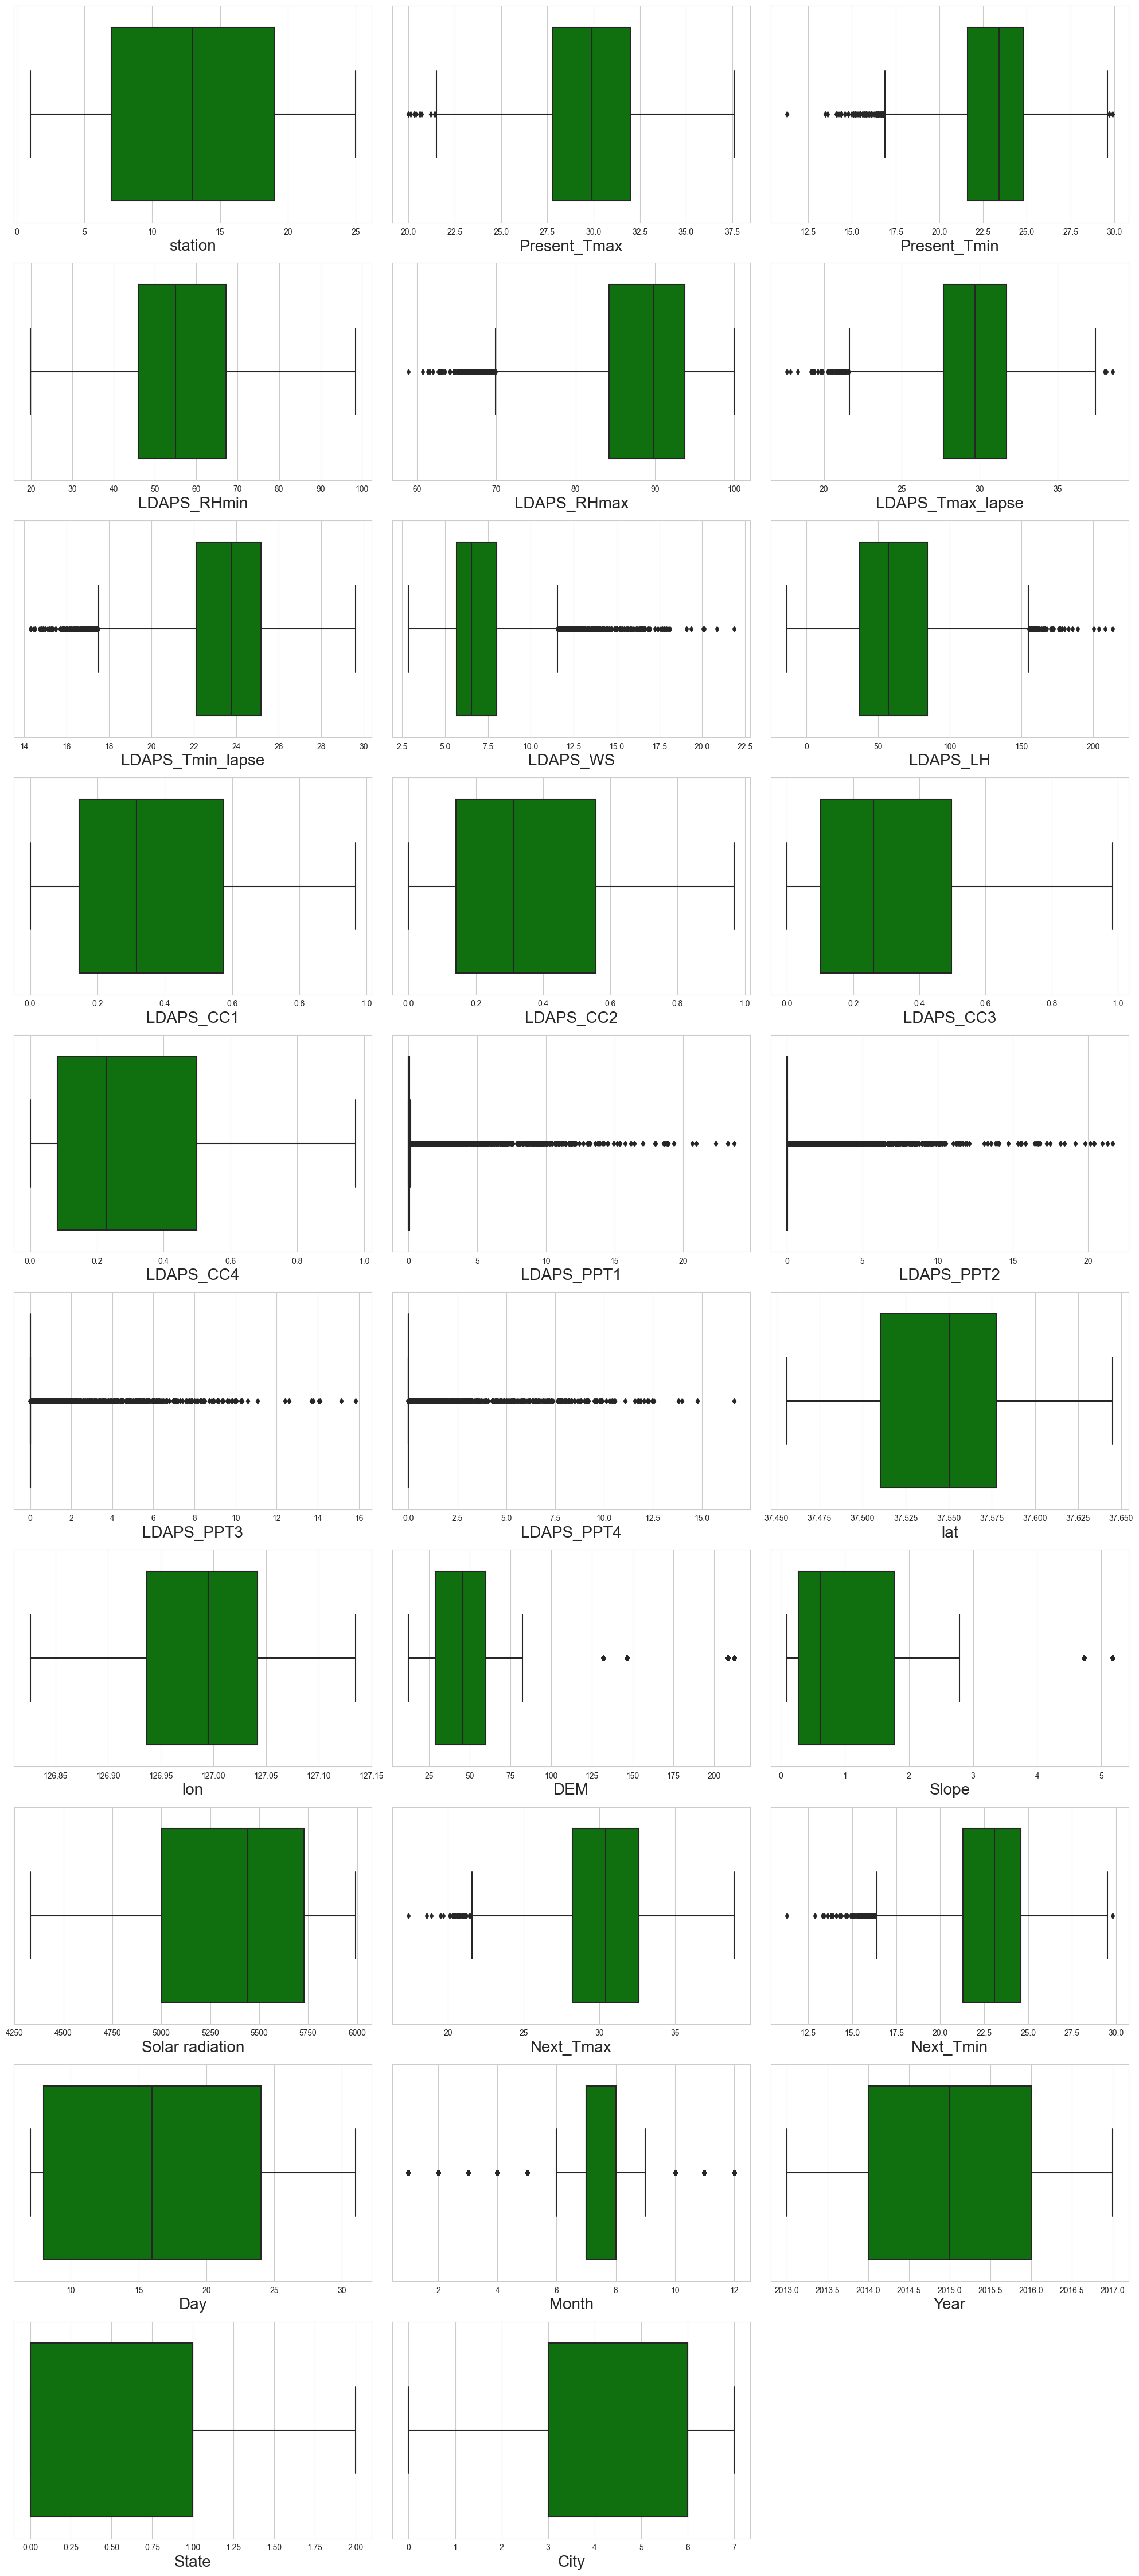

In [60]:
plt.figure(figsize=(20,45),facecolor='white')
plotnumber=1

for column in temperature:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(temperature[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

<b> From Boxplot we can see outliers exist dataset.</b>

### Outliers removal using Zscore method

In [61]:
from scipy.stats import zscore
z = np.abs(zscore(temperature))
threshold = 3
temperature1 = temperature[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", temperature.shape)
print ("Shape of the dataframe after removing outliers: ", temperature1.shape)
print ("Percentage of data loss post outlier removal: ", (temperature.shape[0]-temperature1.shape[0])/temperature.shape[0]*100)

temperature=temperature1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7588, 29)
Shape of the dataframe after removing outliers:  (6739, 29)
Percentage of data loss post outlier removal:  11.188719030047443


We are losing data by 11.18%. Despite its size, we can afford it. Taking into account that our data collection for building ML models has a large number of rows. 

## 2. Skewness of features

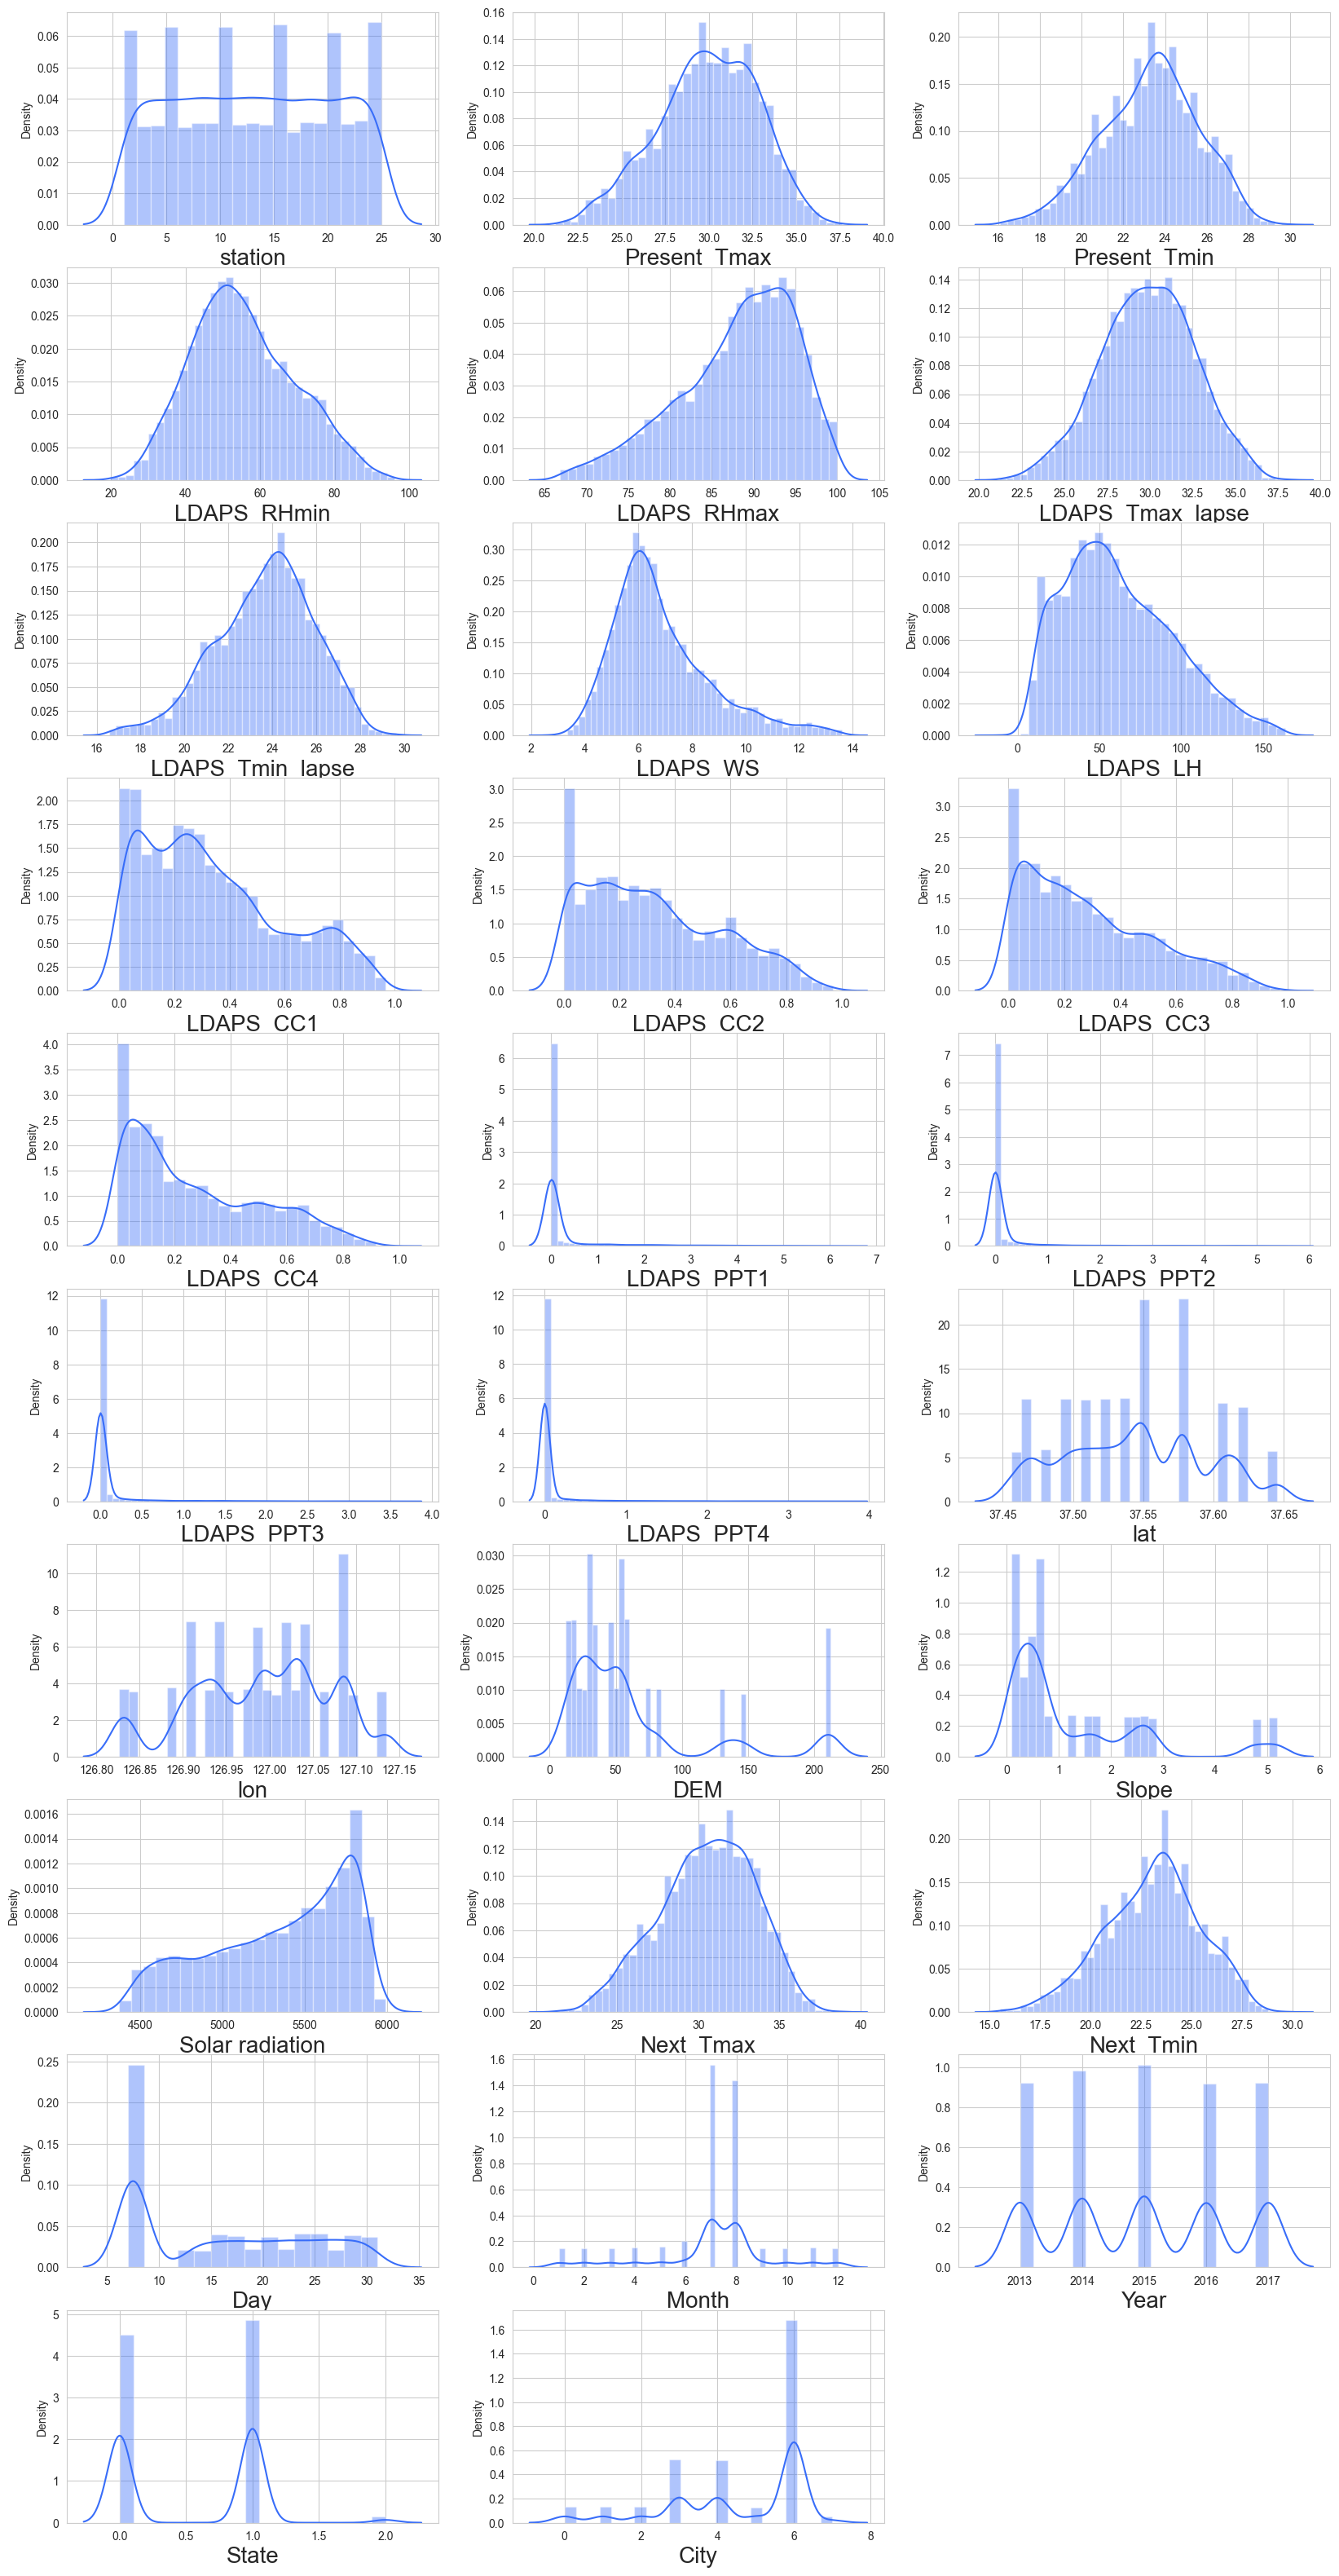

In [62]:
plt.figure(figsize=(20,40),facecolor='white')
sns.set_palette('rainbow')
plotnum=1
for col in temperature:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(temperature[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is a crucial characteristic for continuous data. For categorical features and discrete numerical features like month, there is no relevance to sharpness.Therefore, we will disregard any skewness in discrete numerical and categorical features.**

**We also going to ignore sknewness in target feature.**

In [63]:
temperature.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
State               0.143188
City               -0.951530
dtype: float64

**Here some are positively skewed while others are negatively skewed. We gone use yeo-johnson method for transfromation.**

In [64]:
import numpy, warnings
numpy.warnings= warnings
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
temperature[skew] = scaler.fit_transform(temperature[skew].values)

**For LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 skewness has not been removed but it got reduced**

## 3. Corrleation 

In [65]:
temperature.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005179     -0.136914     -0.076877    -0.070194   
Month             0.003494      0.039443     -0.019387    -0.070498   
Year              0.006658      0.099185      0.099222     0.001709   
State            -0.107709     -0.049572     -0.073556    -0.078498   
City             -0.172313     -0.028619     -0.032508    -0.060087   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.20

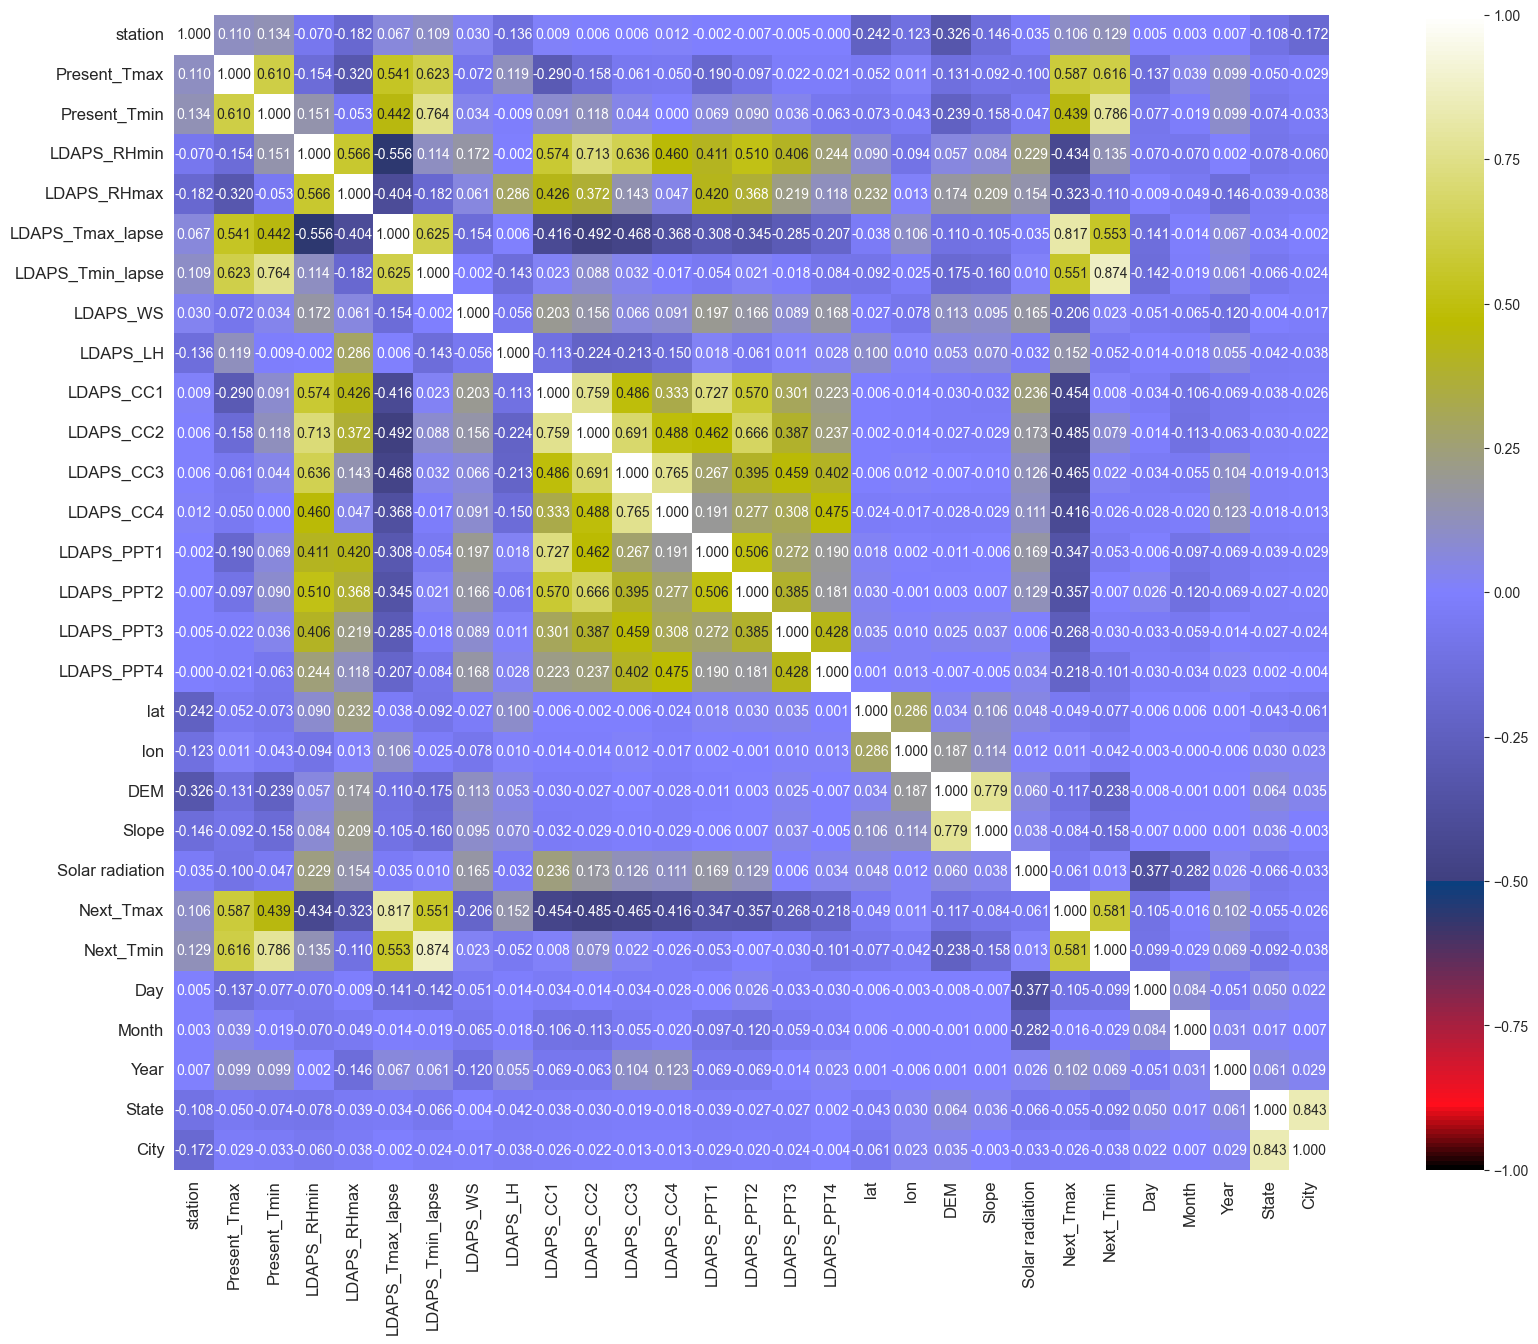

In [66]:
plt.figure(figsize=(25,15))
sns.heatmap(temperature.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

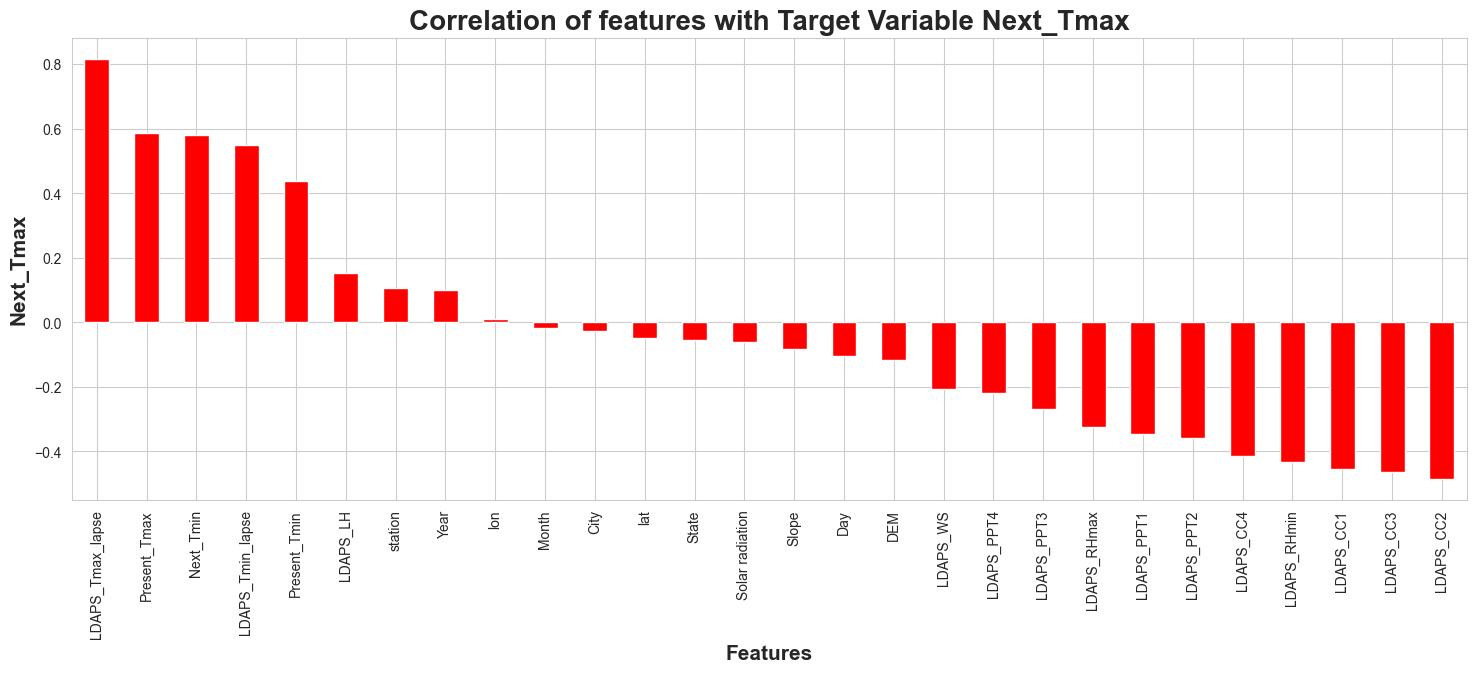

In [67]:
plt.figure(figsize = (18,6))
temperature.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'red')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

**Temperature and cloud cover related feature are moderately or highly correlated with Target Feature.**

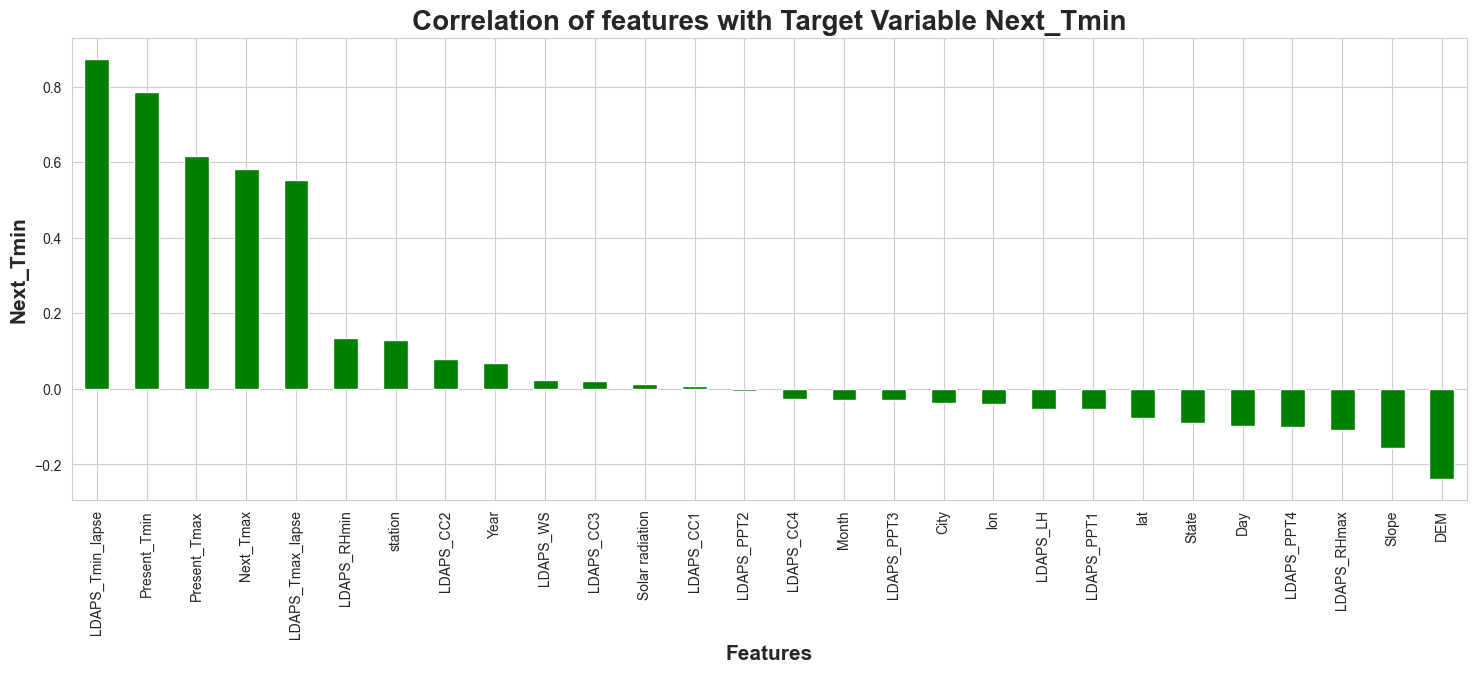

In [68]:
plt.figure(figsize = (18,6))
temperature.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'green')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

**Target Feature and temperature-related features have a moderate to strong correlation.**

# Machine Learning Model Building For Next_Tmax

## Standard Scaling

In [69]:
# Splitting data in target and dependent feature
X = temperature.drop(['Next_Tmax'], axis =1)
Y = temperature['Next_Tmax']

In [70]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

## Checking Multicollinearity between features using variance_inflation_factor

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.353177           station
1     2.849784      Present_Tmax
2     3.383435      Present_Tmin
3     6.077961       LDAPS_RHmin
4     2.614712       LDAPS_RHmax
5     6.650091  LDAPS_Tmax_lapse
6     8.235731  LDAPS_Tmin_lapse
7     1.225322          LDAPS_WS
8     1.523389          LDAPS_LH
9     4.874106         LDAPS_CC1
10    5.533647         LDAPS_CC2
11    4.567857         LDAPS_CC3
12    2.792518         LDAPS_CC4
13    2.601274        LDAPS_PPT1
14    2.174592        LDAPS_PPT2
15    1.592341        LDAPS_PPT3
16    1.601009        LDAPS_PPT4
17    1.310633               lat
18    1.225664               lon
19    3.382228               DEM
20    2.876560             Slope
21    1.487825   Solar radiation
22    5.674284         Next_Tmin
23    1.259835               Day
24    1.122200             Month
25    1.136580              Year
26    3.615665             State
27    3.641816              City

**separate feature VIF is within the permitted range of 10**

## Principle Component Analysis

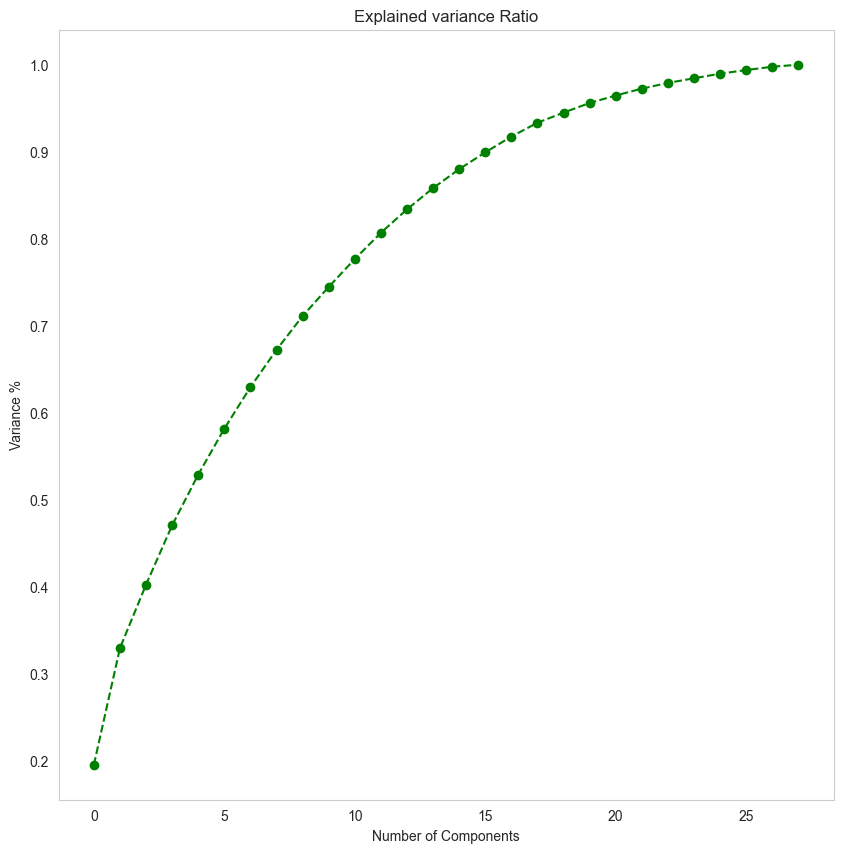

In [73]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'go--')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

#### Observations -
<b> According to the graph, 15 major components account for 90% of the variation in the data.  The first 15 components will be used in our prediction. </b>

In [74]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [75]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


### Finding best Random state

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8018242128787927 on Random_state 108


## Linear Regression Base Model

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [31.91671752 30.15944717 29.11536556 ... 25.88094278 25.16676324
 32.69812886]


Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [80]:
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 1.014950654634492
Mean squared error : 1.745822572111516
Root Mean Squared Error: 1.3212957928153393


 R2 Score :
0.8018242128787927


In [81]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6695150338019881


### Applying other ML Models

In [83]:
from sklearn.ensemble import BaggingRegressor

In [84]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7089613309352523
Mean squared error : 0.8894183696043175
Root Mean Squared Error: 0.9430897993321301


 R2 Score :
0.8990383167842685
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6163673561151076
Mean squared error : 0.665301800809352
Root Mean Squared Error: 0.8156603464735502


 R2 Score :
0.9244787470647228
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0445593525179855
Mean squared error : 2.0591232014388487
Root Mean Squared Error: 1.4349645296796882


 R2 Score :
0.7662601184431137
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.17094122398254

In [85]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean Cross Validation Score :",score.mean())
    print('_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*')



Cross Validation Score : RandomForestRegressor() :

Mean Cross Validation Score : 0.6870661463650695
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*


Cross Validation Score : ExtraTreesRegressor() :

Mean Cross Validation Score : 0.6943612101108395
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*


Cross Validation Score : DecisionTreeRegressor() :

Mean Cross Validation Score : 0.43171950733220693
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*


Cross Validation Score : AdaBoostRegressor() :

Mean Cross Validation Score : 0.6520127899640594
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*


Cross Validation Score : GradientBoostingRegressor() :

Mean Cross Validation Score : 0.7070021932572204
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*

# Hyper Parameter Tuning : GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameter = {'n_estimators':[200,400,500,600],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [73]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)

In [74]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 1/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-67.166 total time=   1.6s
[CV 2/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 2/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-68.411 total time=   1.8s
[CV 3/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 3/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-78.622 total time=   1.7s
[CV 4/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200
[CV 4/5; 1/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=200;, score=-75.156 total time=   1.7s
[CV 5/5; 1/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimator

[CV 4/5; 8/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=600;, score=-33.529 total time=   5.9s
[CV 5/5; 8/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=600
[CV 5/5; 8/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=6, n_estimators=600;, score=-31.842 total time=   5.9s
[CV 1/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 1/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=-67.166 total time=   1.7s
[CV 2/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 2/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=-68.411 total time=   1.6s
[CV 3/5; 9/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200
[CV 3/5; 9/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=200;, score=-78.622 total time=   1.6s
[CV 4/5; 9/288] START boo

[CV 3/5; 16/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600;, score=-35.140 total time=   5.9s
[CV 4/5; 16/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600
[CV 4/5; 16/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600;, score=-33.529 total time=   6.4s
[CV 5/5; 16/288] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600
[CV 5/5; 16/288] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=10, n_estimators=600;, score=-31.842 total time=   6.0s
[CV 1/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 1/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=-67.166 total time=   1.7s
[CV 2/5; 17/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200
[CV 2/5; 17/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=4, n_estimators=200;, score=-68.411 total time=   1.8s
[CV 3/5; 17

[CV 2/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=-30.333 total time=   6.2s
[CV 3/5; 24/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600
[CV 3/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=-35.140 total time=   6.0s
[CV 4/5; 24/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600
[CV 4/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=-33.529 total time=   6.1s
[CV 5/5; 24/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600
[CV 5/5; 24/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=600;, score=-31.842 total time=   5.9s
[CV 1/5; 25/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200
[CV 1/5; 25/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=8, n_estimators=200;, score=-67.166 total time=   1.7s
[CV 2/5; 25/288]

[CV 5/5; 31/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500;, score=-39.016 total time=   4.5s
[CV 1/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 1/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=-29.667 total time=   5.5s
[CV 2/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 2/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=-30.333 total time=   5.7s
[CV 3/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 3/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=-35.140 total time=   5.7s
[CV 4/5; 32/288] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600
[CV 4/5; 32/288] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=600;, score=-33.529 total time=   5.6s
[CV 5/5

[CV 4/5; 39/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500;, score=0.871 total time=  11.1s
[CV 5/5; 39/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500
[CV 5/5; 39/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500;, score=0.879 total time=  12.4s
[CV 1/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 1/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.888 total time=  10.1s
[CV 2/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 2/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.886 total time=  13.5s
[CV 3/5; 40/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600
[CV 3/5; 40/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=6, n_estimators=600;, score=0.894 total time=  16.0s
[CV 4/5; 40/288] START booster=gbtr

[CV 3/5; 47/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.891 total time=  12.1s
[CV 4/5; 47/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500
[CV 4/5; 47/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.891 total time=  12.0s
[CV 5/5; 47/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500
[CV 5/5; 47/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.895 total time=  13.0s
[CV 1/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 1/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.908 total time=  15.5s
[CV 2/5; 48/288] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600
[CV 2/5; 48/288] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=10, n_estimators=600;, score=0.903 total time=  15.6s
[CV 3/5; 48/288] START boo

[CV 2/5; 55/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.877 total time=   7.2s
[CV 3/5; 55/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[CV 3/5; 55/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.877 total time=   7.7s
[CV 4/5; 55/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[CV 4/5; 55/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.871 total time=   7.1s
[CV 5/5; 55/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[CV 5/5; 55/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.877 total time=   7.5s
[CV 1/5; 56/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600
[CV 1/5; 56/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=600;, score=0.887 total time=   9.4s
[CV 2/5; 56/288] START booster=gbtr

[CV 1/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.896 total time=  11.3s
[CV 2/5; 63/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 2/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.897 total time=  11.6s
[CV 3/5; 63/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 3/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.891 total time=  11.6s
[CV 4/5; 63/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 4/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.891 total time=  16.0s
[CV 5/5; 63/288] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[CV 5/5; 63/288] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.898 total time=  12.6s
[CV 1/5; 64/288] START boo

[CV 1/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.925 total time=   7.4s
[CV 2/5; 71/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 2/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.915 total time=   7.4s
[CV 3/5; 71/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 3/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.925 total time=   7.4s
[CV 4/5; 71/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 4/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.925 total time=   7.6s
[CV 5/5; 71/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[CV 5/5; 71/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.923 total time=   7.9s
[CV 1/5; 72/288] START booster=gbtree, eta=0

[CV 1/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.914 total time=  12.5s
[CV 2/5; 79/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 2/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.911 total time=  12.2s
[CV 3/5; 79/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 3/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.914 total time=  12.2s
[CV 4/5; 79/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 4/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.917 total time=  13.1s
[CV 5/5; 79/288] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[CV 5/5; 79/288] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.917 total time=  12.8s
[CV 1/5; 80/288] START booster=gbtr

[CV 1/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.921 total time=   7.7s
[CV 2/5; 87/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 2/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.915 total time=   7.2s
[CV 3/5; 87/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 3/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.926 total time=   8.3s
[CV 4/5; 87/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 4/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.920 total time=  29.0s
[CV 5/5; 87/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[CV 5/5; 87/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.922 total time=  11.4s
[CV 1/5; 88/288] START booster=gbtree, eta=0

[CV 1/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.913 total time=  10.4s
[CV 2/5; 95/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 2/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.908 total time=  10.3s
[CV 3/5; 95/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 3/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.911 total time=  10.2s
[CV 4/5; 95/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 4/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.911 total time=  10.3s
[CV 5/5; 95/288] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[CV 5/5; 95/288] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.918 total time=  10.2s
[CV 1/5; 96/288] START booster=gbtr

[CV 5/5; 102/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=400;, score=-47.775 total time=  44.7s
[CV 1/5; 103/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 1/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=-36.431 total time=  49.9s
[CV 2/5; 103/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 2/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=-37.215 total time=  50.8s
[CV 3/5; 103/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 3/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=-43.014 total time=  50.6s
[CV 4/5; 103/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[CV 4/5; 103/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=-41.065 total time=  53.4s
[CV 5/5; 103/288] START b

[CV 4/5; 110/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400;, score=-50.257 total time=  35.5s
[CV 5/5; 110/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400
[CV 5/5; 110/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=400;, score=-47.775 total time=  35.9s
[CV 1/5; 111/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500
[CV 1/5; 111/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=-36.431 total time=  55.7s
[CV 2/5; 111/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500
[CV 2/5; 111/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=-37.215 total time=  55.3s
[CV 3/5; 111/288] START booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500
[CV 3/5; 111/288] END booster=dart, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=-43.014 total time=  56.1s
[CV 4/5; 111/288

[CV 3/5; 118/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400;, score=-52.620 total time=  36.7s
[CV 4/5; 118/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400
[CV 4/5; 118/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400;, score=-50.257 total time=  36.8s
[CV 5/5; 118/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400
[CV 5/5; 118/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=400;, score=-47.775 total time=  36.5s
[CV 1/5; 119/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500
[CV 1/5; 119/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500;, score=-36.431 total time=  55.2s
[CV 2/5; 119/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500
[CV 2/5; 119/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500;, score=-37.215 total time=  55.2s
[CV 3/5; 119/288] START b

[CV 2/5; 126/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400;, score=-45.616 total time=  37.3s
[CV 3/5; 126/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400
[CV 3/5; 126/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400;, score=-52.620 total time=  36.0s
[CV 4/5; 126/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400
[CV 4/5; 126/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400;, score=-50.257 total time=  36.6s
[CV 5/5; 126/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400
[CV 5/5; 126/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=400;, score=-47.775 total time=  37.1s
[CV 1/5; 127/288] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500
[CV 1/5; 127/288] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500;, score=-36.431 total time=  58.5s
[CV 2/5; 127/288

[CV 1/5; 134/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.840 total time=  44.7s
[CV 2/5; 134/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 134/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.838 total time=  42.5s
[CV 3/5; 134/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 134/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.825 total time=  51.1s
[CV 4/5; 134/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 134/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.824 total time=  43.1s
[CV 5/5; 134/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400
[CV 5/5; 134/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=6, n_estimators=400;, score=0.832 total time=  53.9s
[CV 1/5; 135/288] START booster=dart, eta=0.

[CV 1/5; 142/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.859 total time=  44.1s
[CV 2/5; 142/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400
[CV 2/5; 142/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.852 total time=  44.0s
[CV 3/5; 142/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400
[CV 3/5; 142/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.837 total time=  44.1s
[CV 4/5; 142/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400
[CV 4/5; 142/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.840 total time=  43.2s
[CV 5/5; 142/288] START booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400
[CV 5/5; 142/288] END booster=dart, eta=0.01, gamma=0.0, max_depth=10, n_estimators=400;, score=0.846 total time=  44.2s
[CV 1/5; 143/288] START booster=dar

[CV 1/5; 150/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.840 total time=  40.2s
[CV 2/5; 150/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[CV 2/5; 150/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.838 total time=  38.9s
[CV 3/5; 150/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[CV 3/5; 150/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.824 total time=  34.4s
[CV 4/5; 150/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[CV 4/5; 150/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.825 total time=  35.6s
[CV 5/5; 150/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400
[CV 5/5; 150/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=400;, score=0.831 total time=  34.4s
[CV 1/5; 151/288] START booster=dart, eta=0.

[CV 1/5; 158/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.858 total time=  43.7s
[CV 2/5; 158/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400
[CV 2/5; 158/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.856 total time=  43.5s
[CV 3/5; 158/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400
[CV 3/5; 158/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.837 total time=  44.2s
[CV 4/5; 158/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400
[CV 4/5; 158/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.840 total time=  44.5s
[CV 5/5; 158/288] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400
[CV 5/5; 158/288] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=400;, score=0.848 total time=  43.6s
[CV 1/5; 159/288] START booster=dar

[CV 1/5; 166/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.924 total time=  35.2s
[CV 2/5; 166/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 2/5; 166/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.915 total time=  50.0s
[CV 3/5; 166/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 3/5; 166/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.925 total time=  40.1s
[CV 4/5; 166/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 4/5; 166/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.924 total time=  41.3s
[CV 5/5; 166/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400
[CV 5/5; 166/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=6, n_estimators=400;, score=0.922 total time=  40.4s
[CV 1/5; 167/288] START booster=dart, eta=0.1, gamma=

[CV 1/5; 174/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.914 total time=  43.0s
[CV 2/5; 174/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400
[CV 2/5; 174/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.911 total time=  42.6s
[CV 3/5; 174/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400
[CV 3/5; 174/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.914 total time=  43.2s
[CV 4/5; 174/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400
[CV 4/5; 174/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.917 total time=  42.6s
[CV 5/5; 174/288] START booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400
[CV 5/5; 174/288] END booster=dart, eta=0.1, gamma=0.0, max_depth=10, n_estimators=400;, score=0.917 total time=  43.0s
[CV 1/5; 175/288] START booster=dart, eta=0.

[CV 1/5; 182/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.921 total time=  34.8s
[CV 2/5; 182/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400
[CV 2/5; 182/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.915 total time=  34.7s
[CV 3/5; 182/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400
[CV 3/5; 182/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.926 total time=  36.0s
[CV 4/5; 182/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400
[CV 4/5; 182/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.920 total time=  34.5s
[CV 5/5; 182/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400
[CV 5/5; 182/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=400;, score=0.922 total time=  35.3s
[CV 1/5; 183/288] START booster=dart, eta=0.1, gamma=

[CV 1/5; 190/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.913 total time=  38.1s
[CV 2/5; 190/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400
[CV 2/5; 190/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.908 total time=  38.2s
[CV 3/5; 190/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400
[CV 3/5; 190/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.911 total time=  38.1s
[CV 4/5; 190/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400
[CV 4/5; 190/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.911 total time=  39.0s
[CV 5/5; 190/288] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400
[CV 5/5; 190/288] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=400;, score=0.918 total time=  39.0s
[CV 1/5; 191/288] START booster=dart, eta=0.

[CV 3/5; 195/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=500;, score=-42.585 total time=   0.4s
[CV 4/5; 195/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=500
[05:09:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 195/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=500;, score=-40.758 total time=   0.4s
[CV 5/5; 195/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=500
[05:09:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 195/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=4, n_estimators=500;, score=-38.843 total time=   0.4s
[CV 1/5; 196/28

[CV 3/5; 199/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=-42.585 total time=   0.4s
[CV 4/5; 199/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[05:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 199/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=-40.758 total time=   0.4s
[CV 5/5; 199/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500
[05:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 199/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=500;, score=-38.843 total time=   0.5s
[CV 1/5; 200/28

[CV 3/5; 203/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=500;, score=-42.585 total time=   0.4s
[CV 4/5; 203/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=500
[05:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 203/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=500;, score=-40.758 total time=   0.4s
[CV 5/5; 203/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=500
[05:09:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 203/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=500;, score=-38.843 total time=   0.4s
[CV 1/5; 204/28

[CV 3/5; 207/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=-42.585 total time=   0.4s
[CV 4/5; 207/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500
[05:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 207/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=-40.758 total time=   0.4s
[CV 5/5; 207/288] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500
[05:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 207/288] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=500;, score=-38.843 total time=   0.4s
[CV 1/5; 2

[CV 3/5; 211/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=500;, score=-42.585 total time=   0.4s
[CV 4/5; 211/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=500
[05:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 211/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=500;, score=-40.758 total time=   0.4s
[CV 5/5; 211/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=500
[05:10:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 211/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=500;, score=-38.843 total time=   0.4s
[CV 1/5; 212/28

[CV 3/5; 215/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500;, score=-42.585 total time=   0.4s
[CV 4/5; 215/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500
[05:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 215/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500;, score=-40.758 total time=   0.4s
[CV 5/5; 215/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500
[05:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 215/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=500;, score=-38.843 total time=   0.4s
[CV 1/5; 216/28

[CV 3/5; 219/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=500;, score=-42.585 total time=   0.4s
[CV 4/5; 219/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=500
[05:10:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 219/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=500;, score=-40.758 total time=   0.4s
[CV 5/5; 219/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=500
[05:10:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 219/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=500;, score=-38.843 total time=   0.4s
[CV 1/5; 220/28

[CV 3/5; 223/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500;, score=-42.585 total time=   0.3s
[CV 4/5; 223/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500
[05:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 223/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500;, score=-40.758 total time=   0.4s
[CV 5/5; 223/288] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500
[05:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 223/288] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=10, n_estimators=500;, score=-38.843 total time=   0.4s
[CV 1/5; 2

[CV 3/5; 227/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=500;, score=0.737 total time=   0.4s
[CV 4/5; 227/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=500
[05:10:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 227/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=500;, score=0.753 total time=   0.4s
[CV 5/5; 227/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=500
[05:10:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 227/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=500;, score=0.764 total time=   0.4s
[CV 1/5; 228/288] START bo

[CV 3/5; 231/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500;, score=0.737 total time=   0.4s
[CV 4/5; 231/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500
[05:10:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 231/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500;, score=0.753 total time=   0.4s
[CV 5/5; 231/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500
[05:10:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 231/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=500;, score=0.764 total time=   0.4s
[CV 1/5; 232/288] START bo

[CV 3/5; 235/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=500;, score=0.737 total time=   0.4s
[CV 4/5; 235/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=500
[05:10:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 235/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=500;, score=0.753 total time=   0.4s
[CV 5/5; 235/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=500
[05:10:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 235/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=500;, score=0.764 total time=   0.4s
[CV 1/5; 236/288] START bo

[CV 3/5; 239/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.737 total time=   0.4s
[CV 4/5; 239/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500
[05:11:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 239/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.753 total time=   0.4s
[CV 5/5; 239/288] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500
[05:11:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 239/288] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=500;, score=0.764 total time=   0.4s
[CV 1/5; 240/288] STA

[CV 3/5; 243/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=500;, score=0.737 total time=   0.4s
[CV 4/5; 243/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=500
[05:11:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 243/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=500;, score=0.753 total time=   0.4s
[CV 5/5; 243/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=500
[05:11:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 243/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=500;, score=0.764 total time=   0.4s
[CV 1/5; 244/288] START bo

[CV 3/5; 247/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.737 total time=   0.4s
[CV 4/5; 247/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[05:11:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 247/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.753 total time=   0.4s
[CV 5/5; 247/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500
[05:11:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 247/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=500;, score=0.764 total time=   0.4s
[CV 1/5; 248/288] START bo

[CV 3/5; 251/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=500;, score=0.737 total time=   0.4s
[CV 4/5; 251/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=500
[05:11:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 251/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=500;, score=0.753 total time=   0.4s
[CV 5/5; 251/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=500
[05:11:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 251/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=500;, score=0.764 total time=   0.4s
[CV 1/5; 252/288] START bo

[CV 3/5; 255/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.737 total time=   0.4s
[CV 4/5; 255/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[05:11:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 255/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.753 total time=   0.4s
[CV 5/5; 255/288] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500
[05:11:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 255/288] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=500;, score=0.764 total time=   0.4s
[CV 1/5; 256/288] STA

[CV 3/5; 259/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=500;, score=0.763 total time=   0.4s
[CV 4/5; 259/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=500
[05:11:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 259/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=500;, score=0.766 total time=   0.4s
[CV 5/5; 259/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=500
[05:11:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 259/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=500;, score=0.786 total time=   0.4s
[CV 1/5; 260/288] START booster

[CV 3/5; 263/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.763 total time=   0.4s
[CV 4/5; 263/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[05:11:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 263/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.766 total time=   0.4s
[CV 5/5; 263/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500
[05:11:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 263/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=500;, score=0.786 total time=   0.4s
[CV 1/5; 264/288] START booster

[CV 3/5; 267/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=500;, score=0.763 total time=   0.4s
[CV 4/5; 267/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=500
[05:11:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 267/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=500;, score=0.766 total time=   0.4s
[CV 5/5; 267/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=500
[05:11:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 267/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=8, n_estimators=500;, score=0.786 total time=   0.4s
[CV 1/5; 268/288] START booster

[CV 3/5; 271/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.763 total time=   0.4s
[CV 4/5; 271/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[05:12:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 271/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.766 total time=   0.4s
[CV 5/5; 271/288] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500
[05:12:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 271/288] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=500;, score=0.786 total time=   0.4s
[CV 1/5; 272/288] START bo

[CV 3/5; 275/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=500;, score=0.763 total time=   0.4s
[CV 4/5; 275/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=500
[05:12:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 275/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=500;, score=0.766 total time=   0.4s
[CV 5/5; 275/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=500
[05:12:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 275/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=500;, score=0.786 total time=   0.4s
[CV 1/5; 276/288] START booster

[CV 3/5; 279/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.763 total time=   0.4s
[CV 4/5; 279/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[05:12:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 279/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.766 total time=   0.4s
[CV 5/5; 279/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500
[05:12:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 279/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=500;, score=0.786 total time=   0.4s
[CV 1/5; 280/288] START booster

[CV 3/5; 283/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=500;, score=0.763 total time=   0.4s
[CV 4/5; 283/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=500
[05:12:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 283/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=500;, score=0.766 total time=   0.4s
[CV 5/5; 283/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=500
[05:12:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 283/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=8, n_estimators=500;, score=0.786 total time=   0.4s
[CV 1/5; 284/288] START booster

[CV 3/5; 287/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.763 total time=   0.4s
[CV 4/5; 287/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[05:12:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 287/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.766 total time=   0.4s
[CV 5/5; 287/288] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500
[05:12:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 287/288] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=500;, score=0.786 total time=   0.4s
[CV 1/5; 288/288] START bo

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [75]:
GCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 6,
 'n_estimators': 600}

## Final Regression Model

In [97]:
Final_mod =  XGBRegressor(n_estimators=600 , booster= 'gbtree', eta= 0.1, max_depth= 6, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in the Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared  (MS) error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared (RMS) Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in the Final Model :
Mean absolute error : 0.4251378663152242
Mean squared  (MS) error : 0.3172505582916402
Root Mean Squared (RMS) Error: 0.5632499962642168


 R2 Score of Final Model :
0.9449706574451997




 Total True Values Vs Total Predicted Value plot :


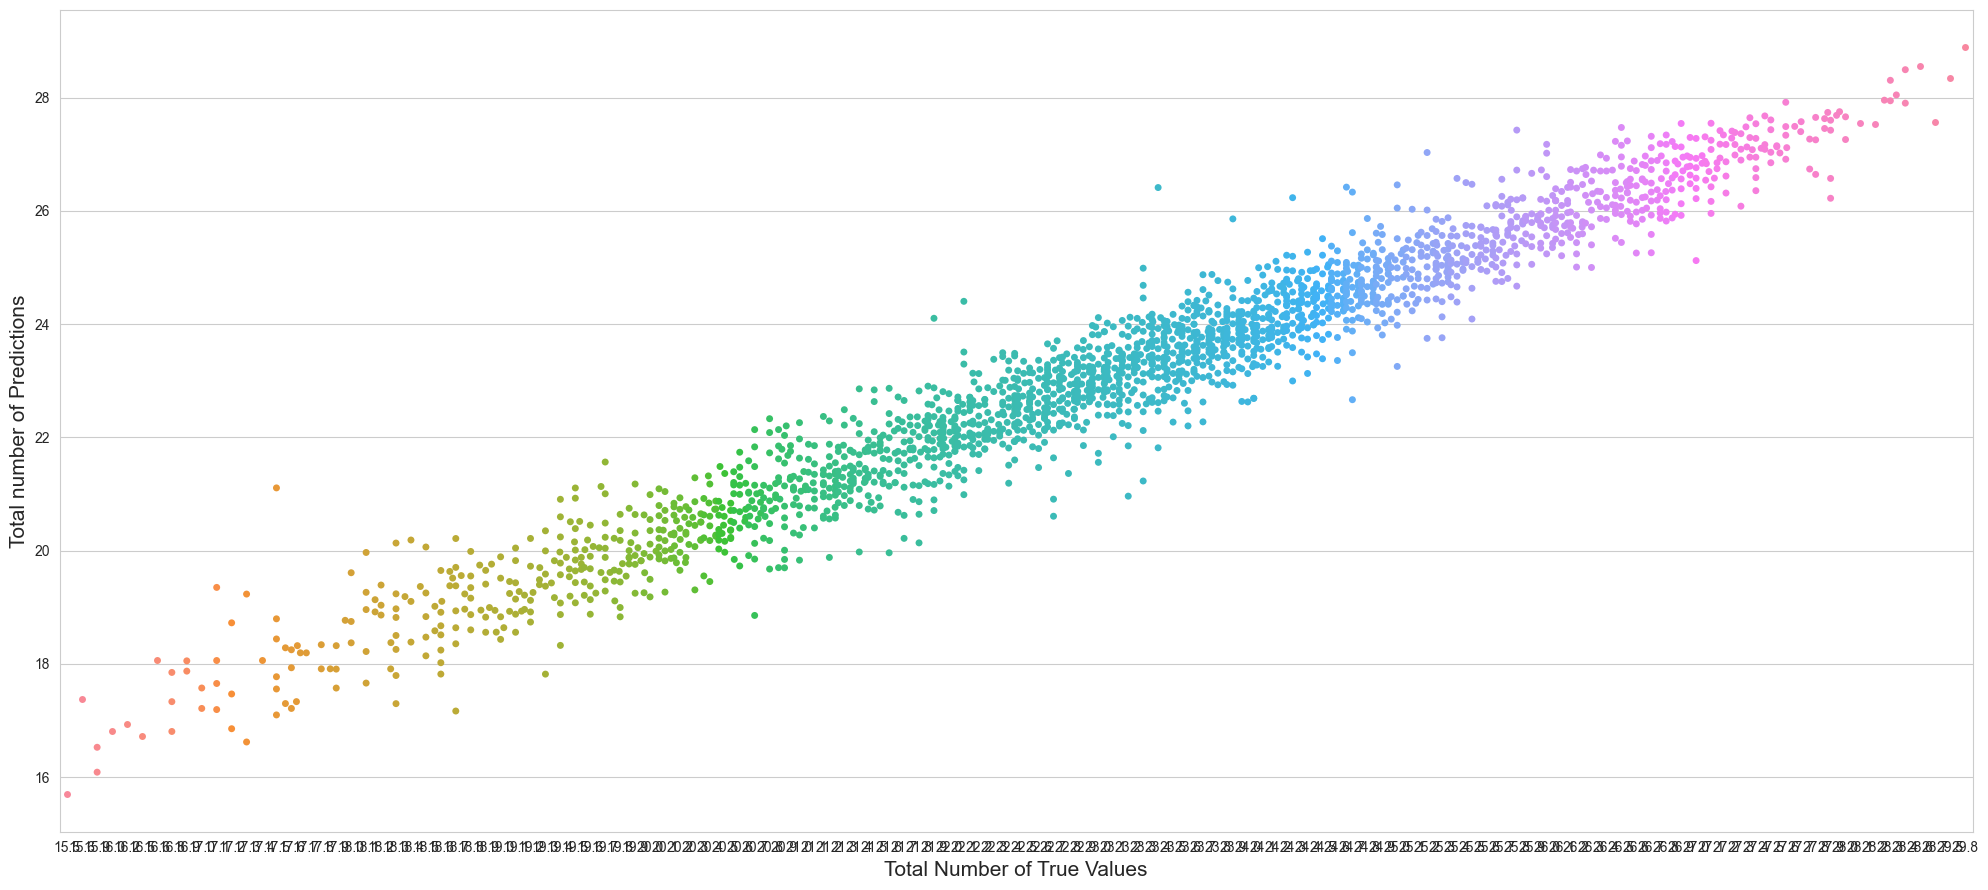

In [98]:
plt.figure(figsize=(20,9))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' Total True Values Vs Total Predicted Value plot :' +'\033[0m')
plt.xlabel('Total Number of True Values' , fontsize=15)
plt.ylabel('Total number of Predictions', fontsize=15)
plt.tight_layout()

## Final Regression Saving Model

In [99]:
import joblib
joblib.dump(Final_mod,'Temperature_Next_Tmax_Forecast_Final.pkl')

['Temperature_Next_Tmax_Forecast_Final.pkl']

### Prediction According Final Regression Model

In [79]:
# Loading the saved model
Model = joblib.load("Temperature_Next_Tmax_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
temperature_Predicted = pd.DataFrame({"Total Actual Values":actual,"Total Predicted Values":predicted},index= range(len(actual)))
temperature_Predicted 

Actual Values  Predicted Values
0              32.0         31.368290
1              30.1         30.052000
2              27.8         28.297882
3              27.6         27.264318
4              29.8         30.213346
...             ...               ...
2219           36.7         36.381721
2220           35.4         34.757820
2221           28.4         26.916483
2222           24.0         24.272707
2223           32.6         32.162075

[2224 rows x 2 columns]

# Machine Learning Model Building For Next_Tmin

## Standard Scaling

In [80]:
# Splitting data in target and dependent feature
X = temperature.drop(['Next_Tmin'], axis =1)
Y = temperature['Next_Tmin']

In [81]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('matrix size of the Training feature variables :',X_train.shape)
print('vector size of the Training target :',Y_train.shape)
print('matrix size of the Test feature Variables :',X_test.shape)
print('vector size of the Test target :',Y_test.shape)

Training feature matrix size: (4515, 28)
Training target vector size: (4515,)
Test feature matrix size: (2224, 28)
Test target vector size: (2224,)


### Finding best Random state

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best Possible R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8512433756352809 on Random_state 43


## Linear Regression Base Model

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Total number of Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Total Number of Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [23.43531019 24.60008496 23.1360548  ... 22.51619756 26.46938431
 25.3600731 ]


Actual Wins:
 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
4097    24.6
3186    17.1
6641    23.1
3854    26.2
1190    25.7
Name: Next_Tmin, Length: 2224, dtype: float64


### Linear Regression Evaluation Matrix

In [85]:
print('\033[1m'+' Error :'+'\033[0m')
print('Absolute Mean error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared (RMS) Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.7363156513347725
Mean squared error : 0.8575992359401751
Root Mean Squared Error: 0.9260665396936524


 R2 Score :
0.8512433756352809


In [86]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean Cross Validation Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.7878211798629869


### Applying other ML Models

In [87]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
xgb=XGBRegressor()
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Absolute Mean error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared (MS) error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared (RMS) Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' The R2 Score Value is  :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.5561236510791366
Mean squared error : 0.5277687945143885
Root Mean Squared Error: 0.7264769745245808


 R2 Score :
0.9084547874731617


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5163089028776977
Mean squared error : 0.4581436416366905
Root Mean Squared Error: 0.6768630892851896


 R2 Score :
0.9205317603515357


 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.8197841726618704
Mean squared error : 1.2220143884892087
Root Mean Squared Error: 1.1054475964464388


 R2 Score :
0.7880330022012146


 Error of  AdaBoostRegressor() :
Mean absolute error : 0.8483266689583543
Mean squared error : 1.102666672264631
Root Mean Squared Error: 1.0500793647456514


 R2 Score :
0.8087347037037158


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.6051070214535538
Mean squared error : 0.5924759378239092
Root Mean Squared Error: 0.7697245856953702


 R2 Score :
0.8972308779736902


 Error of  XGBRe

In [88]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean Cross Validation Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.7923744986744458


Cross Validation Score : ExtraTreesRegressor() :

Mean CV Score : 0.7937791692295828


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.6008794585759661


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : 0.7437605560537314


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.8030211224813429


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max

# Hyper Parameter Tuning : GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
parameter = {'n_estimators':[50,75,100],'gamma':np.arange(0,0.2,0.1),
              'booster' : ['gbtree','dart','gblinear'], 'max_depth':[4,6,8,10],
              'eta' : [0.001, 0.01, 0.1] }

In [91]:
GCV = GridSearchCV(XGBRegressor(),parameter,verbose =10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV 1/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-87.675 total time=   0.2s
[CV 2/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-82.833 total time=   0.2s
[CV 3/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 3/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-81.296 total time=   0.2s
[CV 4/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV 4/5; 1/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50;, score=-89.509 total time=   0.2s
[CV 5/5; 1/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=4, n_estimators=50
[CV

[CV 5/5; 8/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-76.431 total time=   0.4s
[CV 1/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-79.258 total time=   0.5s
[CV 2/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 2/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-74.912 total time=   0.6s
[CV 3/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 3/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-73.506 total time=   0.6s
[CV 4/5; 9/216] START booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[CV 4/5; 9/216] END booster=gbtree, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-80.926 total time=   0.6s
[CV 5/5; 9/216] START boos

[CV 4/5; 16/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-89.509 total time=   0.2s
[CV 5/5; 16/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 16/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-80.394 total time=   0.2s
[CV 1/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 1/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-83.361 total time=   0.4s
[CV 2/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 2/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-78.774 total time=   0.4s
[CV 3/5; 17/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[CV 3/5; 17/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-77.304 total time=   0.4s
[CV 4/5; 17/216] START bo

[CV 3/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-73.506 total time=   0.6s
[CV 4/5; 24/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-80.926 total time=   0.6s
[CV 5/5; 24/216] START booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 5/5; 24/216] END booster=gbtree, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-72.661 total time=   0.5s
[CV 1/5; 25/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 1/5; 25/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=-34.993 total time=   0.3s
[CV 2/5; 25/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[CV 2/5; 25/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=-33.243 total time=   0.3s
[CV 3/5; 25/216] ST

[CV 2/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-19.881 total time=   0.5s
[CV 3/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-19.415 total time=   0.5s
[CV 4/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-21.377 total time=   0.5s
[CV 5/5; 32/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 5/5; 32/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-19.064 total time=   0.5s
[CV 1/5; 33/216] START booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[CV 1/5; 33/216] END booster=gbtree, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=-12.300 total time=   0.7s
[CV 2/5; 33/216] START booster=g

[CV 1/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-34.993 total time=   0.3s
[CV 2/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-33.243 total time=   0.3s
[CV 3/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-32.527 total time=   0.3s
[CV 4/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-35.808 total time=   0.3s
[CV 5/5; 40/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 5/5; 40/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-32.032 total time=   0.3s
[CV 1/5; 41/216] START booster=gbt

[CV 5/5; 47/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75;, score=-19.064 total time=   0.5s
[CV 1/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=-12.300 total time=   0.7s
[CV 2/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=-11.764 total time=   0.7s
[CV 3/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=-11.464 total time=   0.7s
[CV 4/5; 48/216] START booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 48/216] END booster=gbtree, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=-12.634 total time=   0.7s
[CV 5/5; 48/216] 

[CV 5/5; 55/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.910 total time=   0.7s
[CV 1/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 1/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.913 total time=   1.2s
[CV 2/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.928 total time=   1.1s
[CV 3/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.926 total time=   1.1s
[CV 4/5; 56/216] START booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 56/216] END booster=gbtree, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.922 total time=   1.1s
[CV 5/5; 56/216] START booster=gbtree, eta=0.1, gamma

[CV 5/5; 63/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.904 total time=   0.7s
[CV 1/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.890 total time=   0.5s
[CV 2/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.906 total time=   0.5s
[CV 3/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.904 total time=   0.5s
[CV 4/5; 64/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 4/5; 64/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.896 total time=   0.5s
[CV 5/5; 64/216] START booster=gbtree, eta=0.1, gamm

[CV 5/5; 71/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.925 total time=   1.4s
[CV 1/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.919 total time=   1.9s
[CV 2/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.932 total time=   2.0s
[CV 3/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.929 total time=   2.0s
[CV 4/5; 72/216] START booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 4/5; 72/216] END booster=gbtree, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.921 total time=   2.0s
[CV 5/5; 72/216] START booster=gbtre

[CV 5/5; 79/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=50;, score=-80.394 total time=   0.7s
[CV 1/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 1/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-83.361 total time=   1.3s
[CV 2/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-78.774 total time=   1.4s
[CV 3/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-77.304 total time=   1.4s
[CV 4/5; 80/216] START booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75
[CV 4/5; 80/216] END booster=dart, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-85.109 total time=   1.3s
[CV 5/5; 80/216] START booster=dart, eta=0.

[CV 4/5; 87/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-80.926 total time=   2.2s
[CV 5/5; 87/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100
[CV 5/5; 87/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=4, n_estimators=100;, score=-72.661 total time=   2.3s
[CV 1/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-87.675 total time=   0.6s
[CV 2/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-82.833 total time=   0.7s
[CV 3/5; 88/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50
[CV 3/5; 88/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=6, n_estimators=50;, score=-81.296 total time=   0.8s
[CV 4/5; 88/216] START booster=dart, eta

[CV 4/5; 95/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75;, score=-85.109 total time=   1.3s
[CV 5/5; 95/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75
[CV 5/5; 95/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=75;, score=-76.431 total time=   1.3s
[CV 1/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-79.258 total time=   2.3s
[CV 2/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-74.912 total time=   2.3s
[CV 3/5; 96/216] START booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100
[CV 3/5; 96/216] END booster=dart, eta=0.001, gamma=0.1, max_depth=10, n_estimators=100;, score=-73.506 total time=   2.3s
[CV 4/5; 96/216] START boost

[CV 4/5; 103/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50;, score=-35.808 total time=   0.7s
[CV 5/5; 103/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50
[CV 5/5; 103/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=50;, score=-32.032 total time=   0.7s
[CV 1/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 1/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-20.854 total time=   1.5s
[CV 2/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-19.881 total time=   1.5s
[CV 3/5; 104/216] START booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75
[CV 3/5; 104/216] END booster=dart, eta=0.01, gamma=0.0, max_depth=8, n_estimators=75;, score=-19.415 total time=   1.4s
[CV 4/5; 104/216] START booster=dart, eta=0

[CV 3/5; 111/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=-11.464 total time=   2.4s
[CV 4/5; 111/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[CV 4/5; 111/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=-12.635 total time=   2.4s
[CV 5/5; 111/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100
[CV 5/5; 111/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=4, n_estimators=100;, score=-11.219 total time=   2.4s
[CV 1/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-34.993 total time=   0.7s
[CV 2/5; 112/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 112/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=6, n_estimators=50;, score=-33.243 total time=   0.7s
[CV 3/5; 112/216] START booster=dart, 

[CV 3/5; 119/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75;, score=-19.415 total time=   1.4s
[CV 4/5; 119/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75
[CV 4/5; 119/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75;, score=-21.377 total time=   1.4s
[CV 5/5; 119/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75
[CV 5/5; 119/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=75;, score=-19.064 total time=   1.5s
[CV 1/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=-12.300 total time=   2.4s
[CV 2/5; 120/216] START booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 120/216] END booster=dart, eta=0.01, gamma=0.1, max_depth=10, n_estimators=100;, score=-11.764 total time=   2.4s
[CV 3/5; 120/216] START booste

[CV 3/5; 127/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.913 total time=   1.1s
[CV 4/5; 127/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50
[CV 4/5; 127/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.906 total time=   1.1s
[CV 5/5; 127/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50
[CV 5/5; 127/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=50;, score=0.910 total time=   1.1s
[CV 1/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 1/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.913 total time=   2.2s
[CV 2/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75
[CV 2/5; 128/216] END booster=dart, eta=0.1, gamma=0.0, max_depth=8, n_estimators=75;, score=0.928 total time=   2.2s
[CV 3/5; 128/216] START booster=dart, eta=0.1, gamma=0.0, max_

[CV 3/5; 135/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.907 total time=   2.5s
[CV 4/5; 135/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 4/5; 135/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.901 total time=   2.5s
[CV 5/5; 135/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100
[CV 5/5; 135/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=4, n_estimators=100;, score=0.904 total time=   2.5s
[CV 1/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 1/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.890 total time=   1.0s
[CV 2/5; 136/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50
[CV 2/5; 136/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=6, n_estimators=50;, score=0.906 total time=   0.9s
[CV 3/5; 136/216] START booster=dart, eta=0.1, gamma=0.1,

[CV 3/5; 143/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.927 total time=   2.5s
[CV 4/5; 143/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75
[CV 4/5; 143/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.919 total time=   2.5s
[CV 5/5; 143/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75
[CV 5/5; 143/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=75;, score=0.925 total time=   2.5s
[CV 1/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 1/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.919 total time=   4.3s
[CV 2/5; 144/216] START booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100
[CV 2/5; 144/216] END booster=dart, eta=0.1, gamma=0.1, max_depth=10, n_estimators=100;, score=0.932 total time=   4.0s
[CV 3/5; 144/216] START booster=dart, eta=0.1, ga

[CV 3/5; 148/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-81.286 total time=   0.0s
[CV 4/5; 148/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50
[05:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 148/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-89.547 total time=   0.0s
[CV 5/5; 148/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50
[05:31:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 148/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=6, n_estimators=50;, score=-80.341 total time=   0.0s
[CV 1/5; 149/216] ST

[CV 5/5; 152/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=75;, score=-76.363 total time=   0.0s
[CV 1/5; 153/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[05:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 153/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-79.124 total time=   0.0s
[CV 2/5; 153/216] START booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100
[05:31:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 153/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=8, n_estimators=100;, score=-74.834 total time=   0.0s
[CV 3/5; 153/216

[CV 5/5; 156/216] END booster=gblinear, eta=0.001, gamma=0.0, max_depth=10, n_estimators=100;, score=-72.583 total time=   0.0s
[CV 1/5; 157/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=50
[05:31:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 157/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=50;, score=-87.591 total time=   0.0s
[CV 2/5; 157/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=50
[05:32:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 157/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=4, n_estimators=50;, score=-82.784 total time=   0.0s
[CV 3/5; 157/216] 

[CV 1/5; 161/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-83.249 total time=   0.0s
[CV 2/5; 161/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[05:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 161/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-78.708 total time=   0.0s
[CV 3/5; 161/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75
[05:32:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 161/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=6, n_estimators=75;, score=-77.296 total time=   0.0s
[CV 4/5; 161/216] ST

[CV 1/5; 165/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100;, score=-79.124 total time=   0.0s
[CV 2/5; 165/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100
[05:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 165/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100;, score=-74.834 total time=   0.0s
[CV 3/5; 165/216] START booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100
[05:32:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 165/216] END booster=gblinear, eta=0.001, gamma=0.1, max_depth=8, n_estimators=100;, score=-73.505 total time=   0.0s
[CV 4/5; 165/21

[CV 4/5; 169/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=-35.984 total time=   0.0s
[CV 5/5; 169/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50
[05:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 169/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=50;, score=-31.972 total time=   0.0s
[CV 1/5; 170/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75
[05:32:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 170/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=4, n_estimators=75;, score=-20.811 total time=   0.0s
[CV 2/5; 170/216] START b

[CV 4/5; 173/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75;, score=-21.540 total time=   0.0s
[CV 5/5; 173/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75
[05:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 173/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=75;, score=-19.026 total time=   0.0s
[CV 1/5; 174/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=100
[05:32:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 174/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=6, n_estimators=100;, score=-12.291 total time=   0.0s
[CV 2/5; 174/216] START

[CV 4/5; 177/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=-12.777 total time=   0.0s
[CV 5/5; 177/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100
[05:32:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 5/5; 177/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=8, n_estimators=100;, score=-11.193 total time=   0.0s
[CV 1/5; 178/216] START booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=50
[05:32:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 178/216] END booster=gblinear, eta=0.01, gamma=0.0, max_depth=10, n_estimators=50;, score=-34.894 total time=   0.0s
[CV 2/5; 178/216] ST

[05:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 182/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=75;, score=-20.811 total time=   0.0s
[CV 2/5; 182/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=75
[05:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 182/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=75;, score=-19.827 total time=   0.0s
[CV 3/5; 182/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=4, n_estimators=75
[05:32:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:

[CV 5/5; 185/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=75;, score=-19.026 total time=   0.0s
[CV 1/5; 186/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=100
[05:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 186/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=100;, score=-12.291 total time=   0.0s
[CV 2/5; 186/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=100
[05:32:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 186/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=6, n_estimators=100;, score=-11.741 total time=   0.0s
[CV 3/5; 186/216] STA

[CV 5/5; 189/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=8, n_estimators=100;, score=-11.193 total time=   0.0s
[CV 1/5; 190/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=50
[05:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 190/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=50;, score=-34.894 total time=   0.0s
[CV 2/5; 190/216] START booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=50
[05:32:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 190/216] END booster=gblinear, eta=0.01, gamma=0.1, max_depth=10, n_estimators=50;, score=-33.152 total time=   0.0s
[CV 3/5; 190/216] ST

[05:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 1/5; 194/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=75;, score=0.817 total time=   0.0s
[CV 2/5; 194/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=75
[05:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 194/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=75;, score=0.835 total time=   0.0s
[CV 3/5; 194/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=4, n_estimators=75
[05:32:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Pa

[05:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 198/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100;, score=0.836 total time=   0.0s
[CV 3/5; 198/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100
[05:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 198/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100;, score=0.838 total time=   0.0s
[CV 4/5; 198/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=6, n_estimators=100
[05:32:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767:

[CV 2/5; 202/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=50;, score=0.829 total time=   0.0s
[CV 3/5; 202/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=50
[05:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 202/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=50;, score=0.831 total time=   0.0s
[CV 4/5; 202/216] START booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=50
[05:32:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 202/216] END booster=gblinear, eta=0.1, gamma=0.0, max_depth=10, n_estimators=50;, score=0.809 total time=   0.0s
[CV 5/5; 202/216] START booster

[CV 2/5; 206/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75;, score=0.835 total time=   0.0s
[CV 3/5; 206/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75
[05:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 206/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75;, score=0.837 total time=   0.0s
[CV 4/5; 206/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75
[05:32:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 206/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=4, n_estimators=75;, score=0.816 total time=   0.0s
[CV 5/5; 206/216] START booster=gbli

[05:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 2/5; 210/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100;, score=0.836 total time=   0.0s
[CV 3/5; 210/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100
[05:32:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 210/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100;, score=0.838 total time=   0.0s
[CV 4/5; 210/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=6, n_estimators=100
[05:32:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767:

[CV 2/5; 214/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=50;, score=0.829 total time=   0.0s
[CV 3/5; 214/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=50
[05:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 3/5; 214/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=50;, score=0.831 total time=   0.0s
[CV 4/5; 214/216] START booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=50
[05:32:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "max_depth" } are not used.

[CV 4/5; 214/216] END booster=gblinear, eta=0.1, gamma=0.1, max_depth=10, n_estimators=50;, score=0.810 total time=   0.0s
[CV 5/5; 214/216] START booster

GridSearchCV(estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bi...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
   

In [92]:
GCV.best_params_

{'booster': 'dart',
 'eta': 0.1,
 'gamma': 0.0,
 'max_depth': 8,
 'n_estimators': 100}

## Final Regression Model For Next_Tmin

In [88]:
Final_mod =  XGBRegressor(n_estimators=100 , booster= 'dart', eta= 0.1, max_depth= 8, gamma= 0.0 )
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' The Value of the Error in Final Model is :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared  (MS) error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared (RMS) Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of the Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 The Value of the Error in Final Model is :
Mean absolute error : 0.6127518775651781
Mean squared  (MS) error : 0.6529228370204145
Root Mean Squared (RMS) Error: 0.8080364082270146


 R2 Score of the Final Model :
0.925883936189784




 True Values Vs Predicted Value plot :


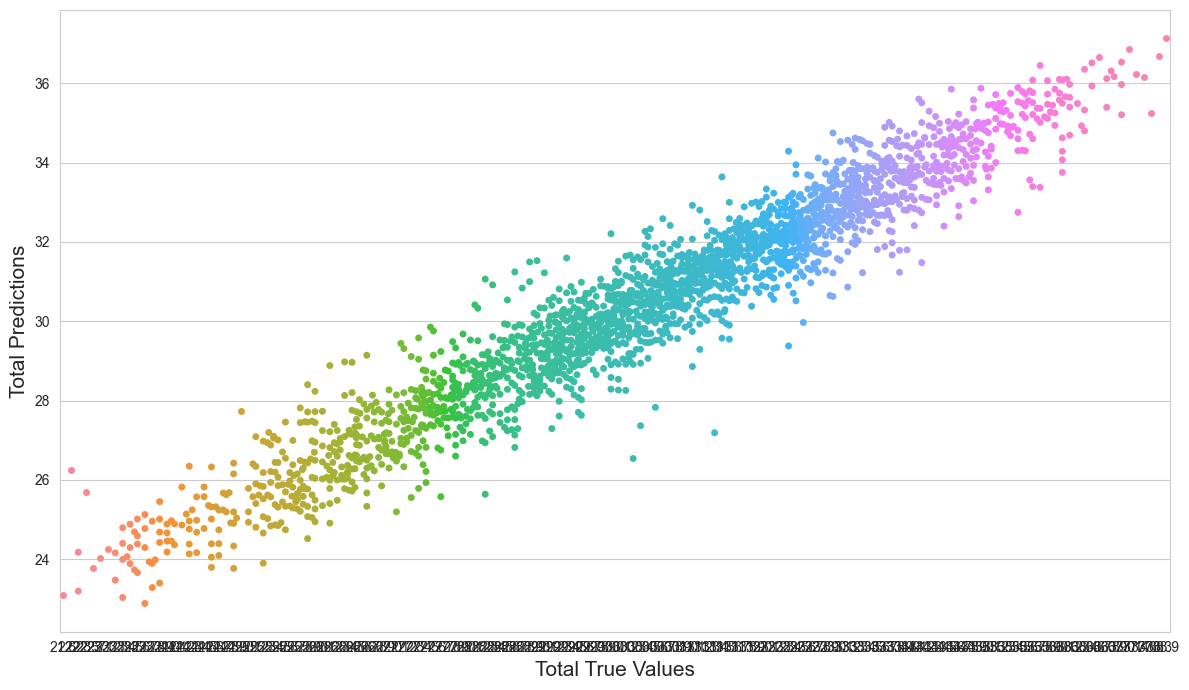

In [89]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('Total True Values' , fontsize=15)
plt.ylabel('Total Predictions', fontsize=15)
plt.tight_layout()

## Saving  Final Regression Model For Next_Tmin

In [90]:
import joblib
joblib.dump(Final_mod,'Temperature_Next_Tmin_Forecast_Final.pkl')

['Temperature_Next_Tmin_Forecast_Final.pkl']

### Prediction According Final Regression Model For Next_Tmin

In [91]:
# Loading the saved model
Model = joblib.load("Temperature_Next_Tmin_Forecast_Final.pkl")

# prediction  DataFrame
actual = np.array(Y_test)
predicted = np.array(Model.predict(X_test))
temperature_Predicted = pd.DataFrame({"Total Actual Values":actual,"Total Predicted Values":predicted},index= range(len(actual)))
temperature_Predicted 

Total Actual Values  Total Predicted Values
0                    32.0               31.143164
1                    30.1               30.496284
2                    27.8               28.140575
3                    27.6               27.388664
4                    29.8               30.350483
...                   ...                     ...
2219                 36.7               36.678303
2220                 35.4               34.886745
2221                 28.4               27.230051
2222                 24.0               24.178246
2223                 32.6               32.426826

[2224 rows x 2 columns]